# Forecasting

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
# pip install --upgrade tensorflow

In [23]:
data = pd.read_excel(r"CocaCola_Sales_Rawdata.xlsx")
print("data Shape:",data.shape)
data.tail()

data Shape: (42, 2)


,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


<Axes: >

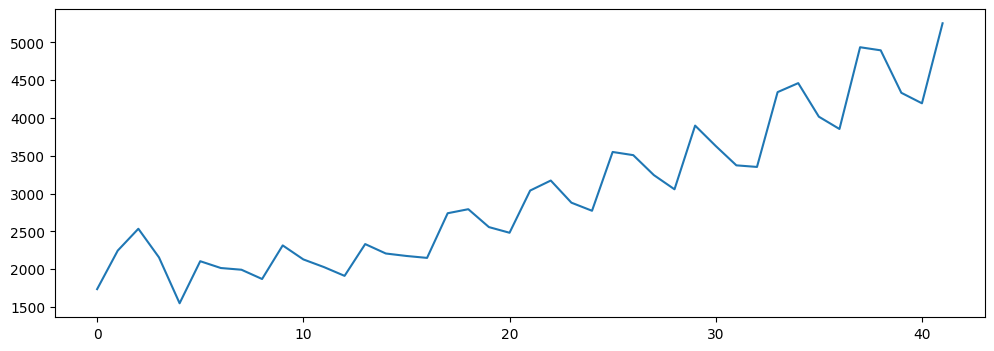

In [24]:
data.Sales.plot(figsize=(12,4))

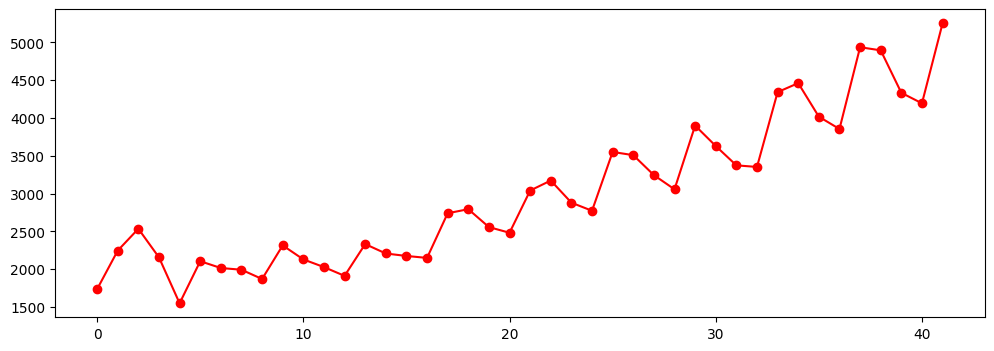

In [5]:
data['Sales'].plot(figsize=(12,4),color='red',marker='o')
plt.show()

### EDA and Data Visualization

In [25]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
data.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [26]:
# Converting into datetime formate as the index was not in correct formate.
data['Date'] = (pd.to_datetime(data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
data.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [27]:
data['Quarters'] = 0

for i in range(42):
    n = data['Quarter'][i]
    data['Quarters'][i] = n[0:2]
    
data.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [28]:
# data.rename({'Month':'Date'}, axis = 1, inplace = True)
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")
data["Month"] = data.Date.dt.strftime("%b") # month extraction
data["Year"] = data.Date.dt.strftime("%Y") # year extraction
data.tail(10)

,Quarter,Sales,Quarter_Year,Date,Quarters,Month,Year
32,Q1_94,3352.0,Q1 1994,1994-01-01,Q1,Jan,1994
33,Q2_94,4342.0,Q2 1994,1994-04-01,Q2,Apr,1994
34,Q3_94,4461.0,Q3 1994,1994-07-01,Q3,Jul,1994
35,Q4_94,4017.0,Q4 1994,1994-10-01,Q4,Oct,1994
36,Q1_95,3854.0,Q1 1995,1995-01-01,Q1,Jan,1995
37,Q2_95,4936.0,Q2 1995,1995-04-01,Q2,Apr,1995
38,Q3_95,4895.0,Q3 1995,1995-07-01,Q3,Jul,1995
39,Q4_95,4333.0,Q4 1995,1995-10-01,Q4,Oct,1995
40,Q1_96,4194.0,Q1 1996,1996-01-01,Q1,Jan,1996
41,Q2_96,5253.0,Q2 1996,1996-04-01,Q2,Apr,1996


the 'Year' column contains string values instead of numeric values. To convert

In [29]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [11]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print('\nNumber of unique duplicates:', len(data[data.duplicated()]));   print(data[data.duplicated()].value_counts())
# duplicate_counts = data[data.duplicated()].value_counts().reset_index(name='Count')['Count']
data=data.drop_duplicates();  print("data Shape:",data.shape)


 Describe:
             Sales                           Date         Year
count    42.000000                             42    42.000000
mean   2994.353308  1991-02-14 23:25:42.857142912  1990.761905
min    1547.818996            1986-01-01 00:00:00  1986.000000
25%    2159.714247            1988-07-24 00:00:00  1988.000000
50%    2782.376999            1991-02-15 00:00:00  1991.000000
75%    3609.250000            1993-09-08 00:00:00  1993.000000
max    5253.000000            1996-04-01 00:00:00  1996.000000
std     977.930896                            NaN     3.074756

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter       42 non-null     object        
 1   Sales         42 non-null     float64       
 2   Quarter_Year  42 non-null     object        
 3   Date          42 non-null     datetime64[ns]
 4   Quarte

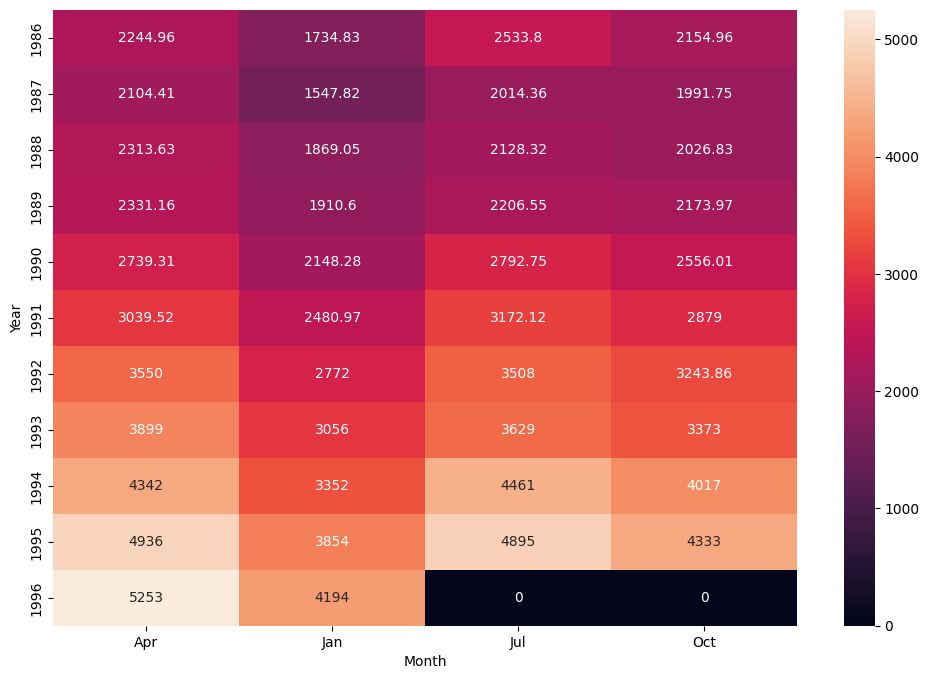

In [17]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="Month",aggfunc="sum",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid valu
plt.show()

In [32]:
data=pd.DataFrame(data[['Date','Sales','Year','Month']])
data.tail()

,Date,Sales,Year,Month
0,1986-01-01,1734.827000,1986,Jan
1,1986-04-01,2244.960999,1986,Apr
2,1986-07-01,2533.804993,1986,Jul
3,1986-10-01,2154.962997,1986,Oct
4,1987-01-01,1547.818996,1987,Jan
5,1987-04-01,2104.411995,1987,Apr
6,1987-07-01,2014.362999,1987,Jul
7,1987-10-01,1991.746998,1987,Oct
8,1988-01-01,1869.049999,1988,Jan
9,1988-04-01,2313.631996,1988,Apr


## Variable check

### Find columns with the same values

In [33]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (42, 4)


In [34]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 2
['Year', 'Month']

Continuous Feature Count 2
['Date', 'Sales']

Other Features Count: 0
Other Features: []

Numeric Data Shape: (42, 2)
Index(['Sales', 'Year'], dtype='object')

Categorical Data Shape: (42, 1)
Categorical Columns: Index(['Month'], dtype='object')


## Categorical Data

Count Plot

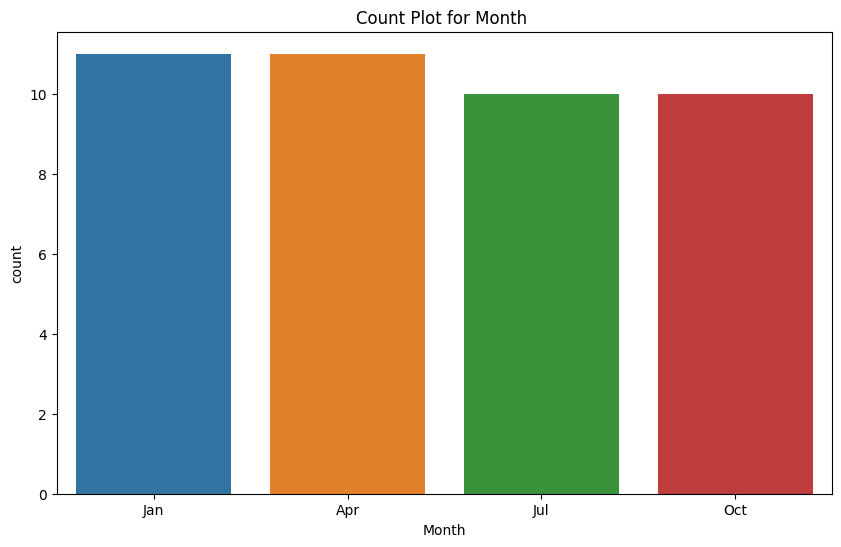

In [35]:
categorical_columns = categorical_data.columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=categorical_data, x=column)
    plt.title(f'Count Plot for {column} ')
    plt.show()

### Labelencoder to convert categorical data into numeric

In [36]:
cat_data = categorical_data.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_data.columns:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
    
    print(f"\nLabel Encoding for {column}:")
    # print("\n", cat_data[column].value_counts())
    unique_values = categorical_data[column].unique()

    for value in unique_values:
        label = label_encoder.transform([value])[0]
        counts = cat_data[column].value_counts()[label]
        print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
    


Label Encoding for Month:
Value: Jan -> Label: 1 --> Counts: 11
Value: Apr -> Label: 0 --> Counts: 11
Value: Jul -> Label: 2 --> Counts: 10
Value: Oct -> Label: 3 --> Counts: 10


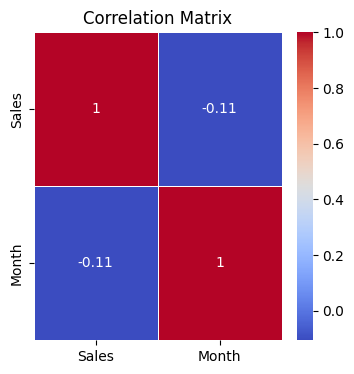

In [39]:
# Correlation Plot
cat_data=pd.concat([numeric_data['Sales'],cat_data],axis=1)
corr_matrix = cat_data.corr(numeric_only=True)
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Numeric Data

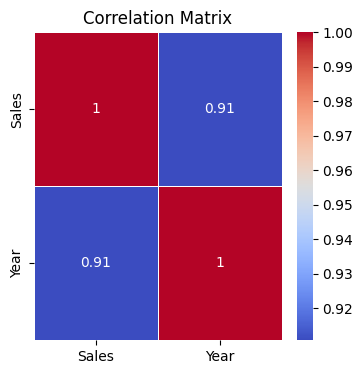

In [40]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

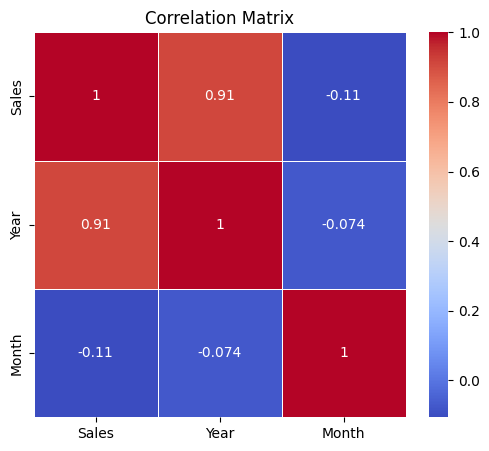

In [41]:
# # # Correlation Plot with All variable
data_2 = data.copy()
data_2[categorical_data.columns]=cat_data[categorical_data.columns]
corr_matrix = data_2.corr(numeric_only=True)
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### visualization

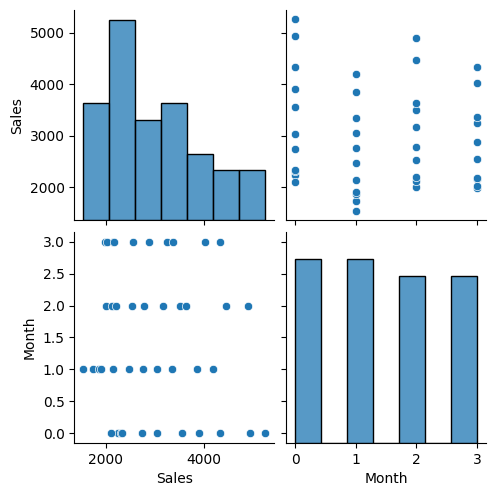

In [42]:
# relationship plot for categorical data
sns.pairplot(data= cat_data)
plt.show()

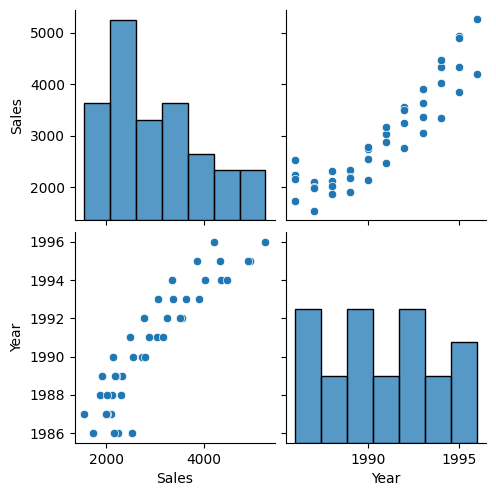

In [43]:
# relationship plot for numeric data
sns.pairplot(data= numeric_data)
plt.show()

### Detect outliers and handle them

In [44]:
# data_filtered=data_2
data_filtered=pd.concat([numeric_data,cat_data[categorical_data.columns]],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(42, 3)

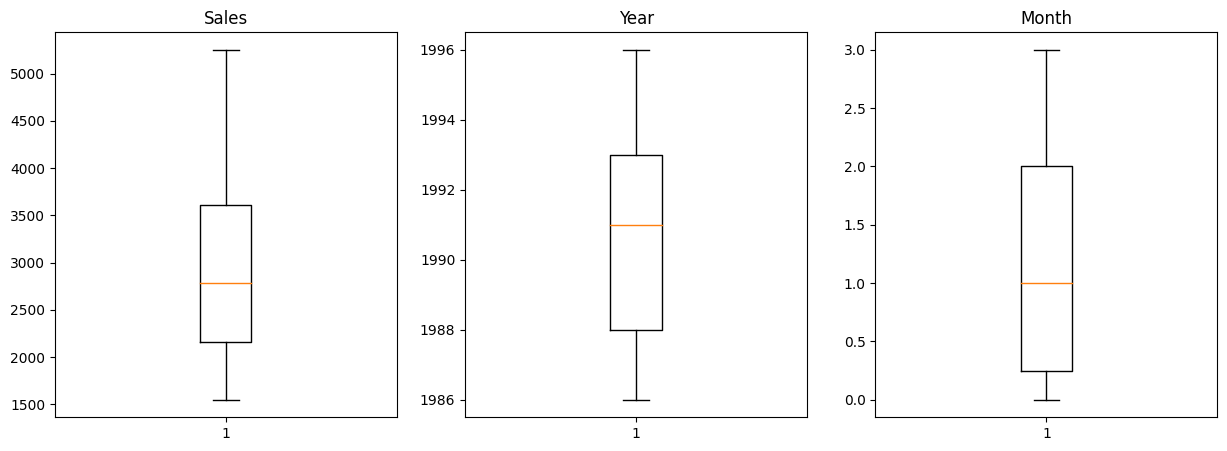

In [45]:
# display boxplots

num_columns = len(data_filtered.columns)                     # numeric_data.columns
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [46]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    # new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    # new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: Sales
Empty DataFrame
Columns: [Sales, Year, Month]
Index: []


Column Name: Year
Empty DataFrame
Columns: [Sales, Year, Month]
Index: []

Shape of new data: (42, 3)


Note: No changes 

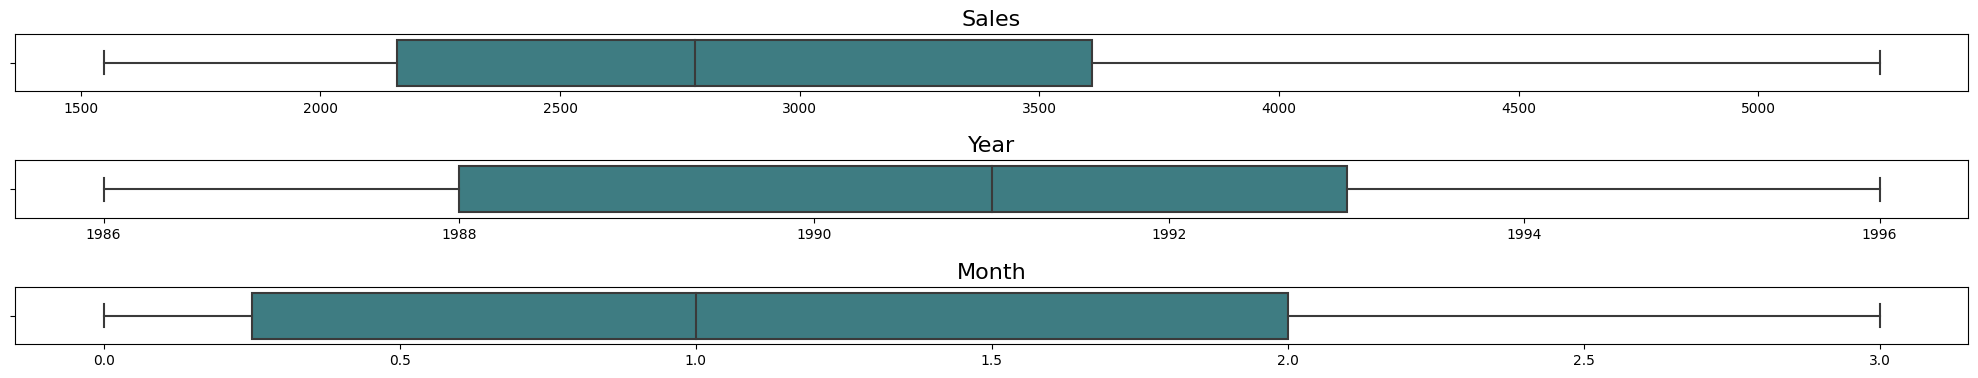

In [47]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 4), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


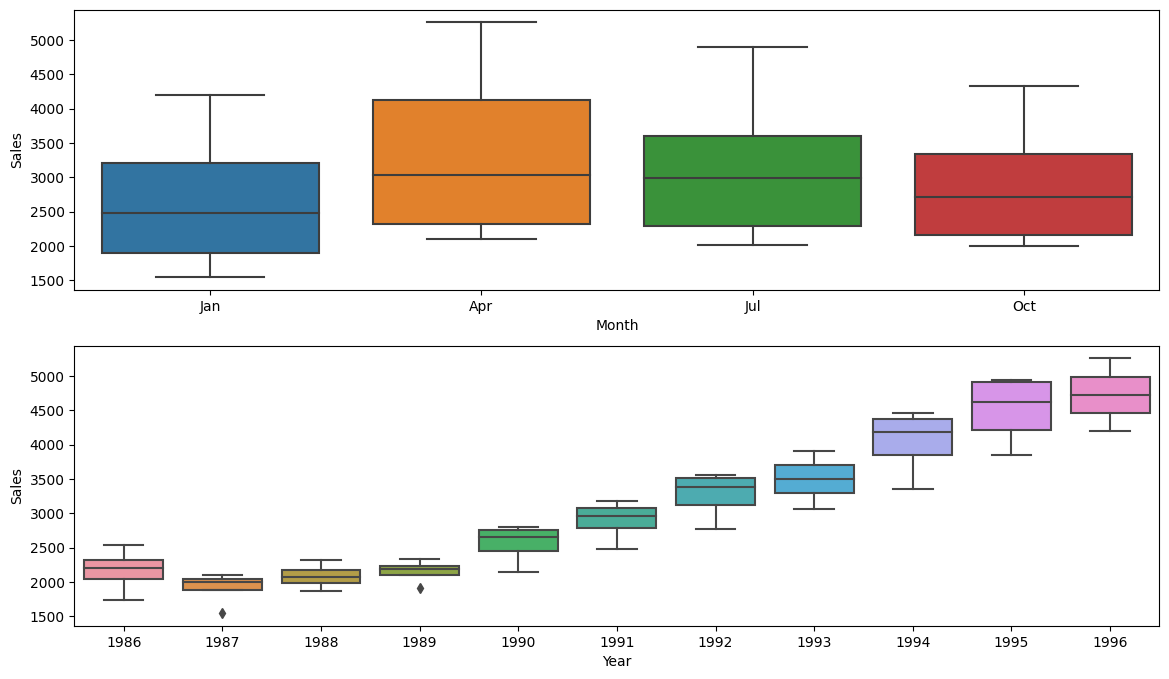

In [49]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="Month",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=data)
plt.show()

### distribution plots

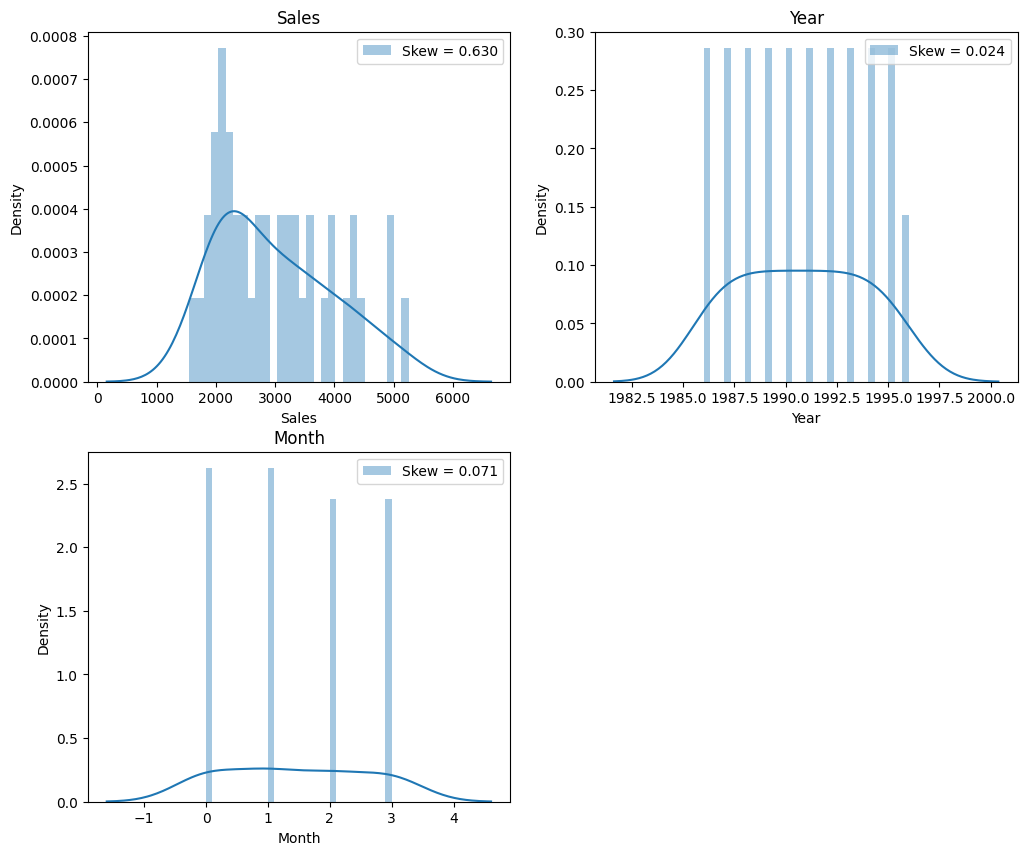

In [50]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


### Histogram & Probability Plot (Q-Q plot)

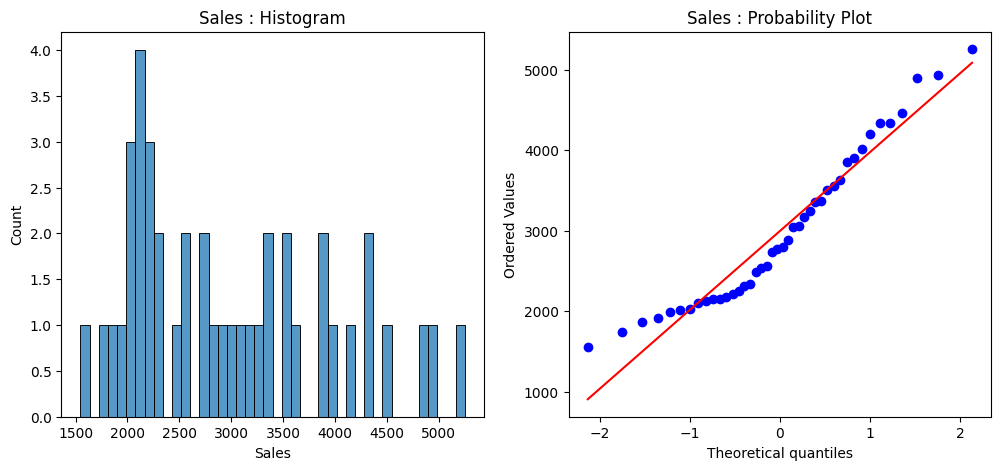

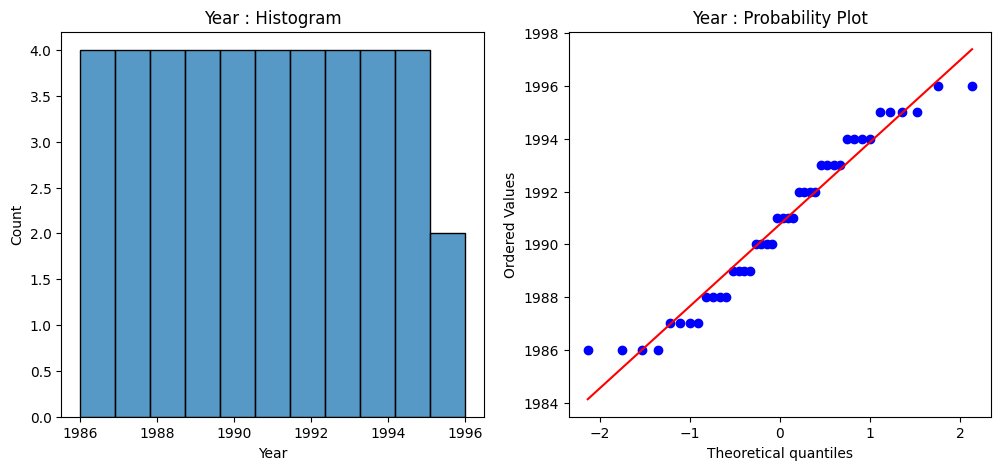

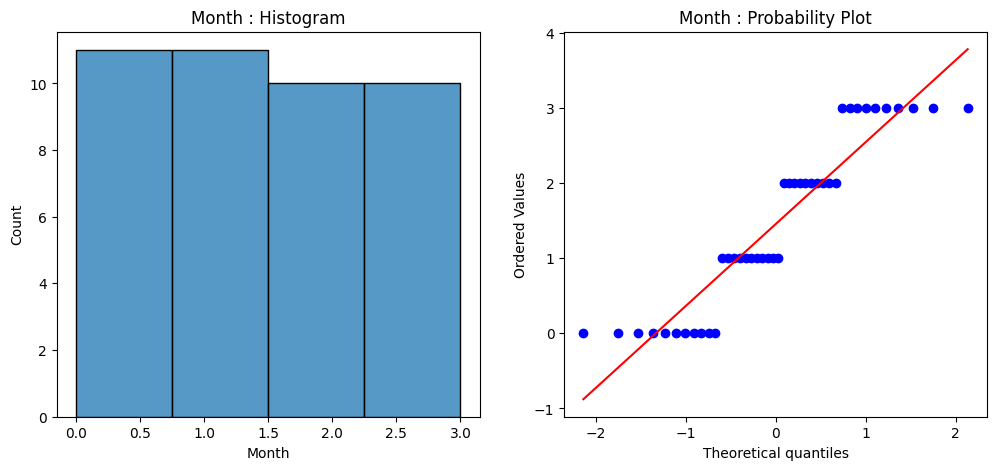

In [51]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    # sns.barplot(x = df[feature].value_counts().index.tolist(), y = df[feature].value_counts().tolist())
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


# Time series plot

## Lag plot

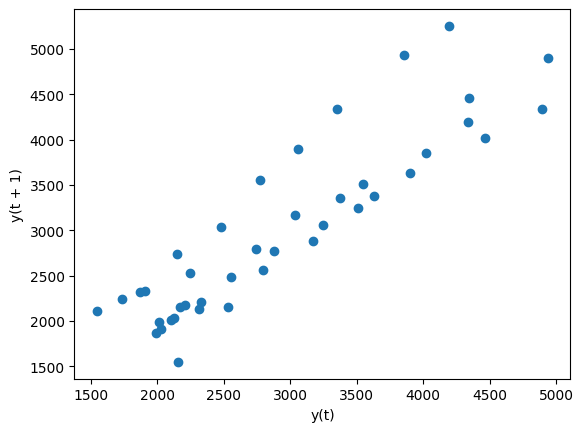

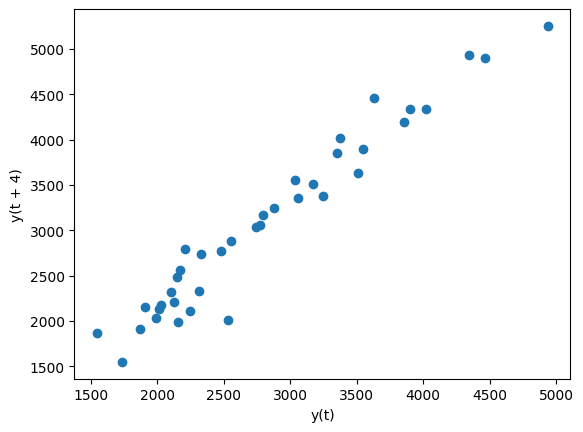

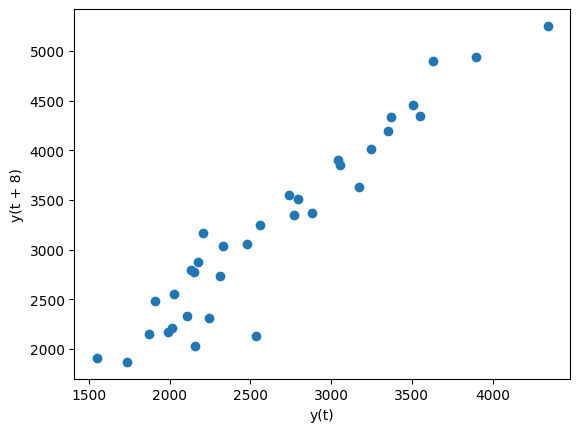

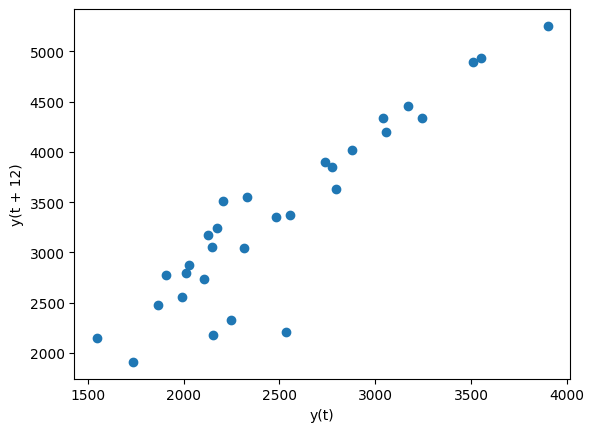

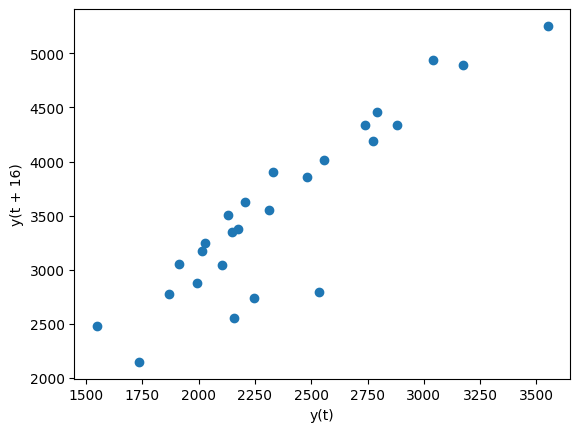

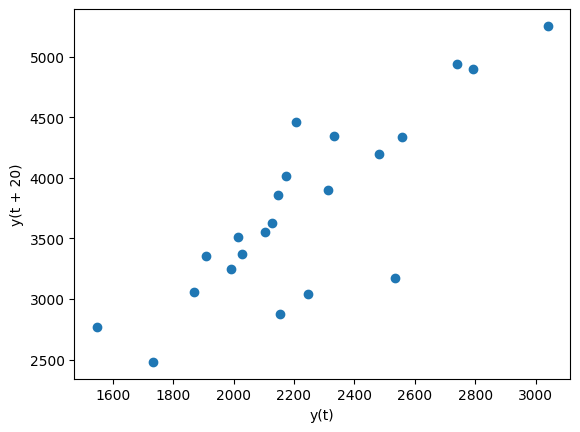

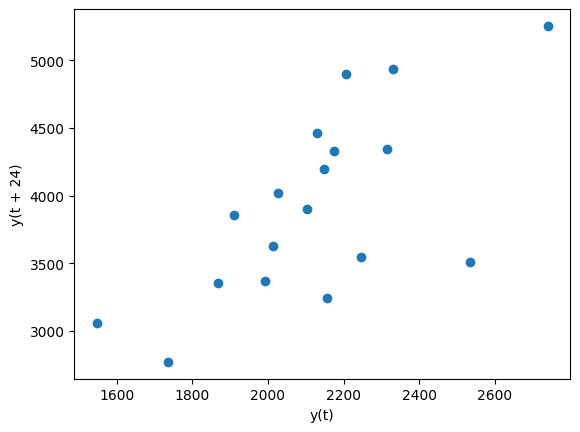

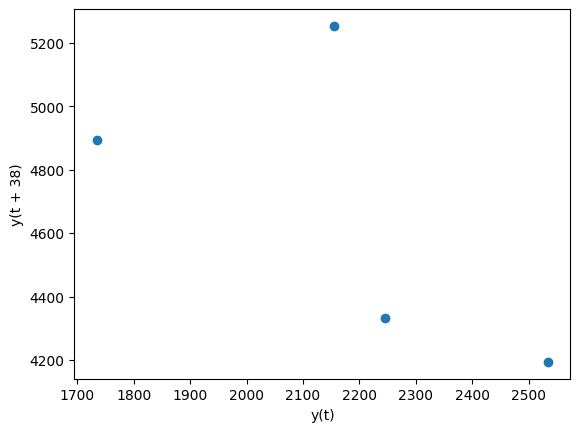

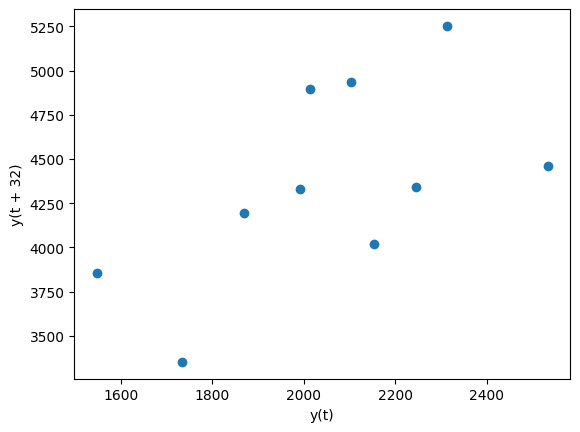

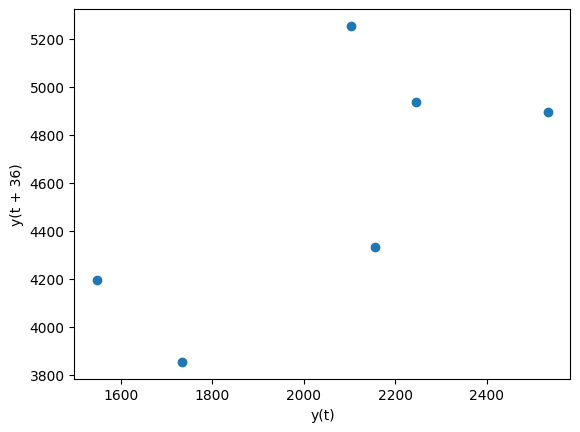

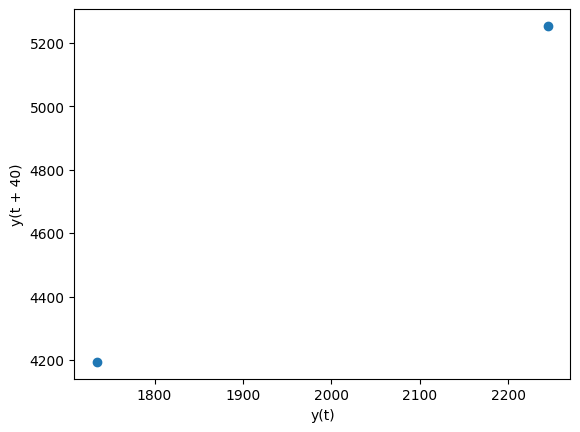

In [53]:
# create a scatter plot
from pandas.plotting import lag_plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(data.Sales, lag=i)
    plt.show()

## The moving averages 

the moving averages of the passenger data for different window sizes

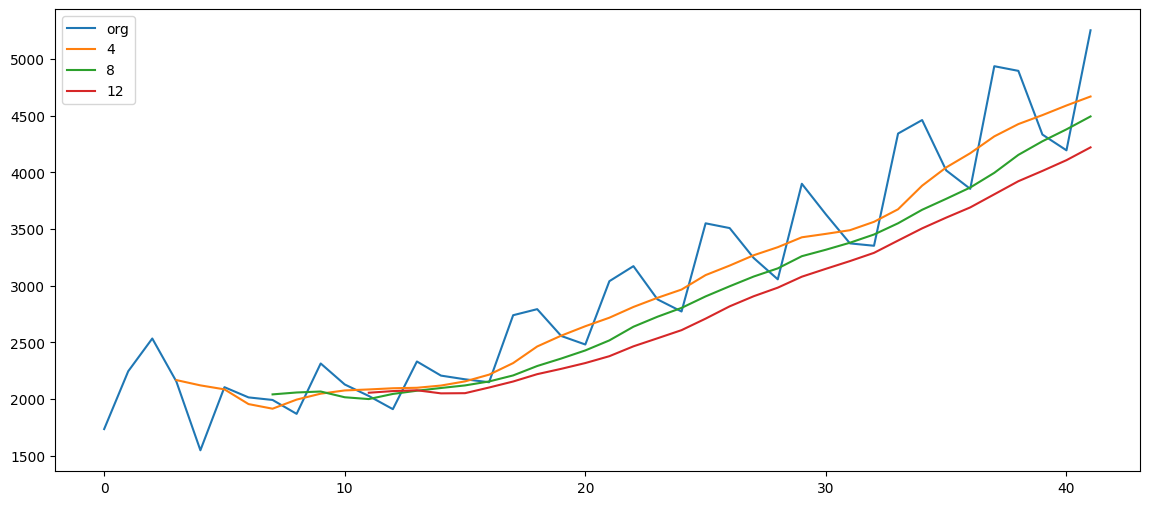

In [54]:
plt.figure(figsize=(14,6))
data.Sales.plot(label="org")
for i in range(4,13,4):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

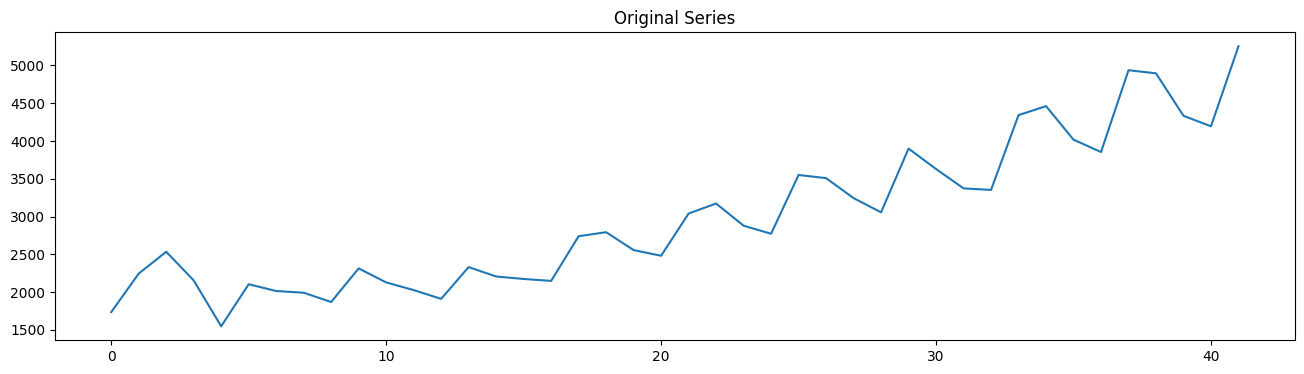

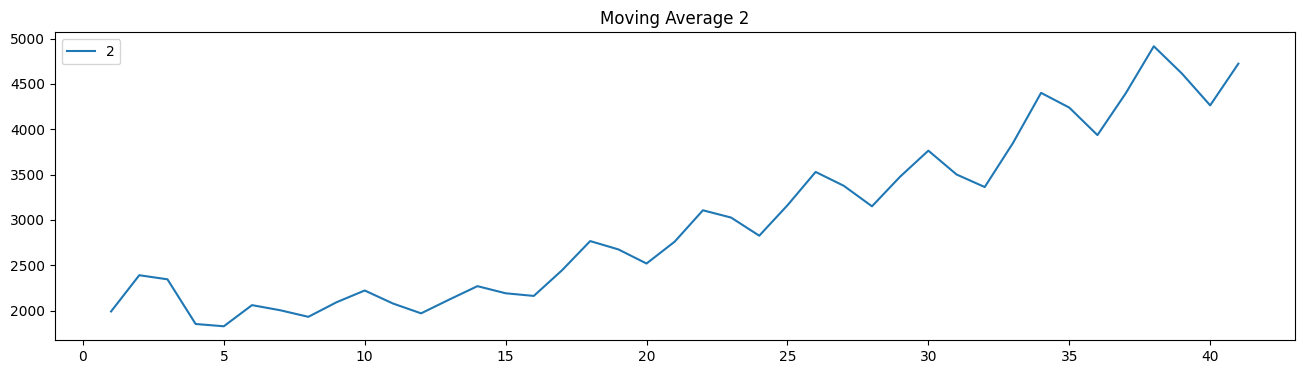

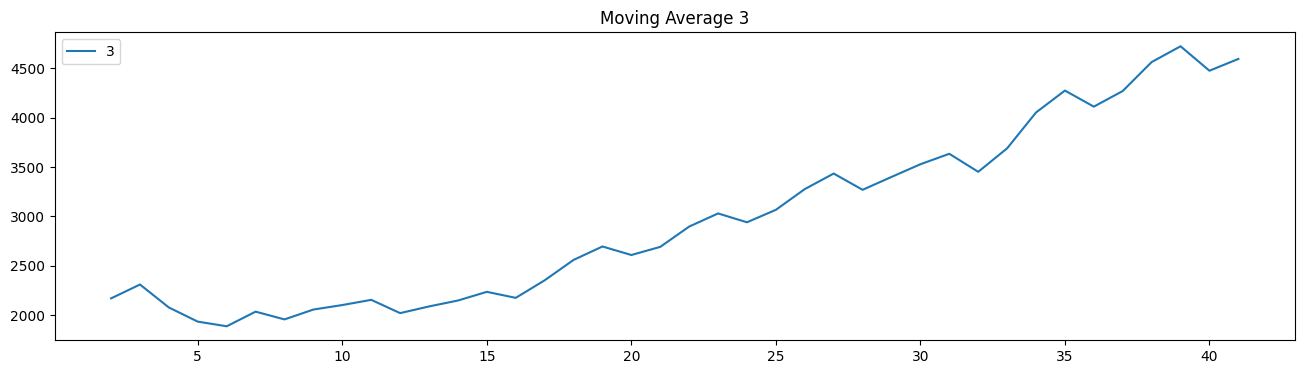

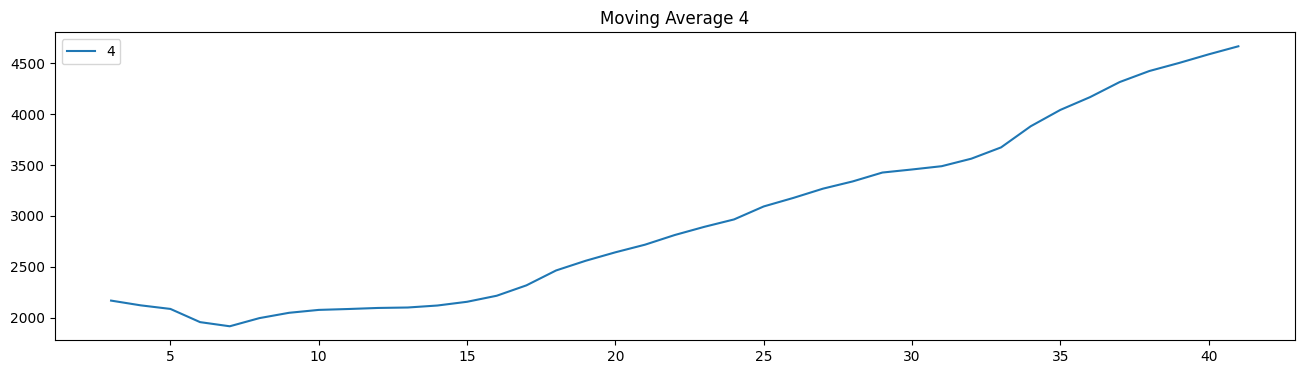

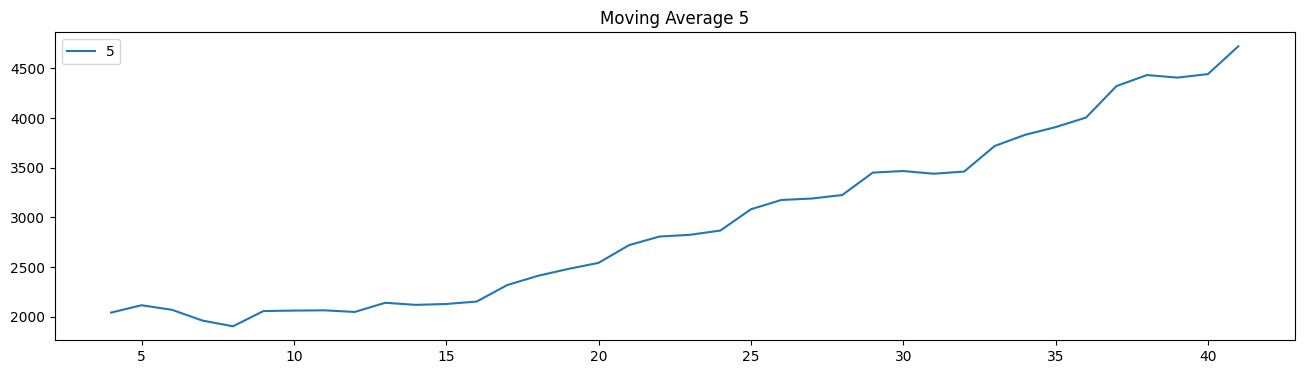

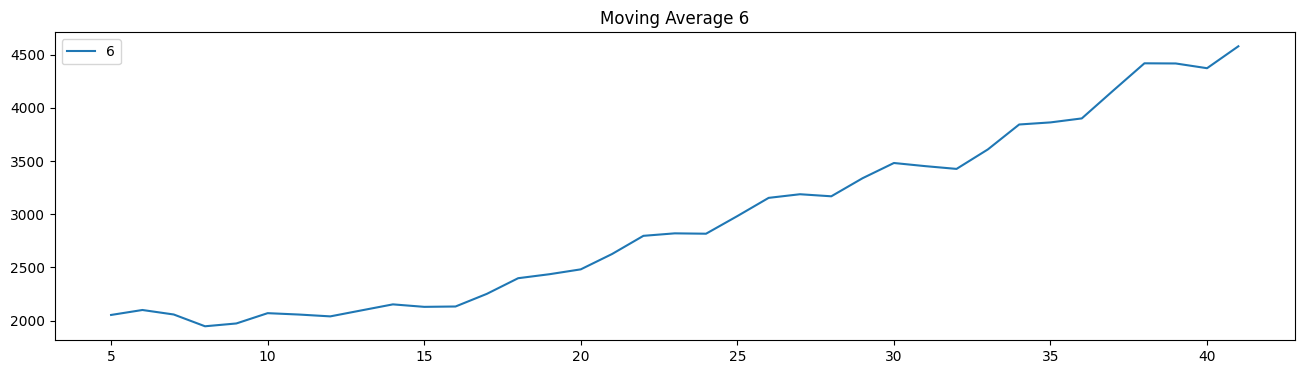

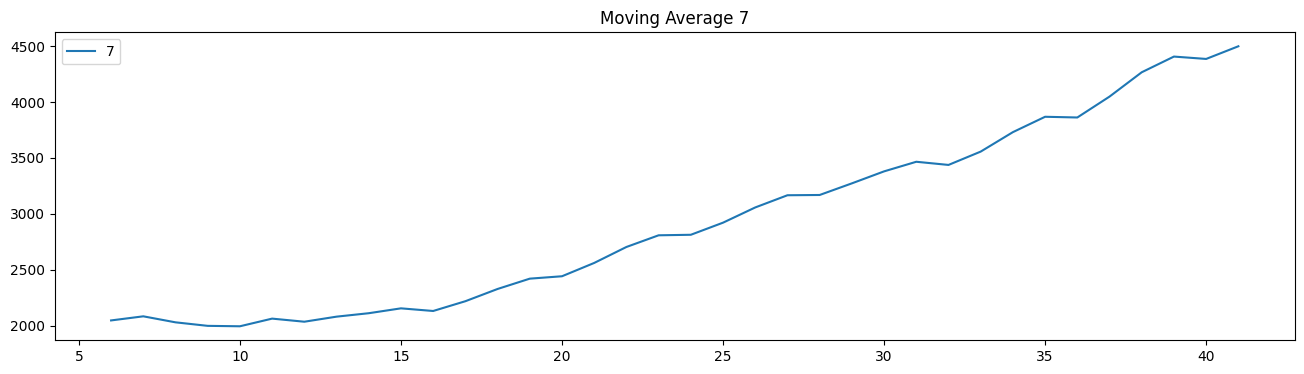

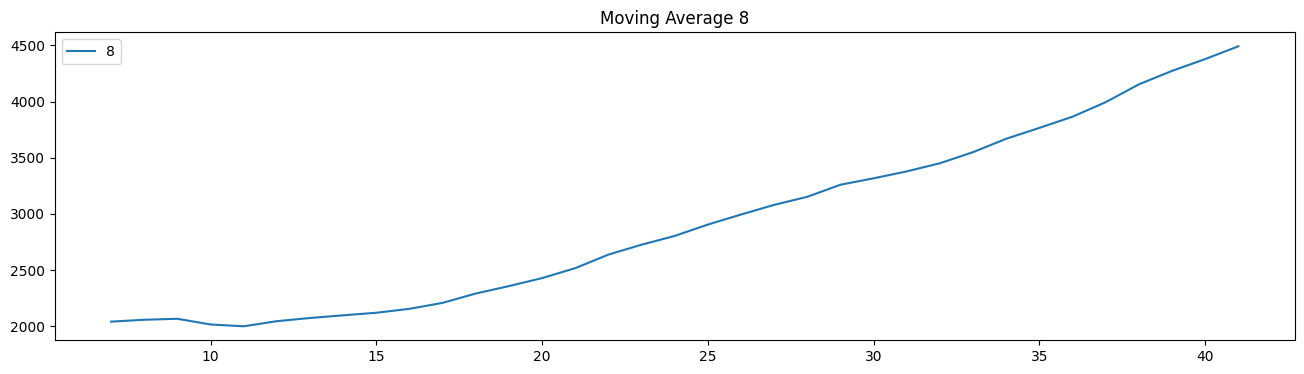

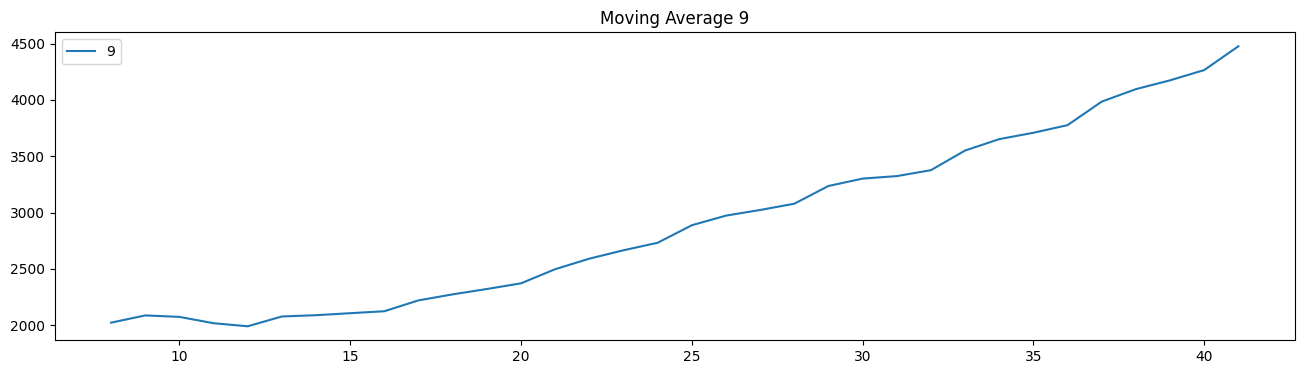

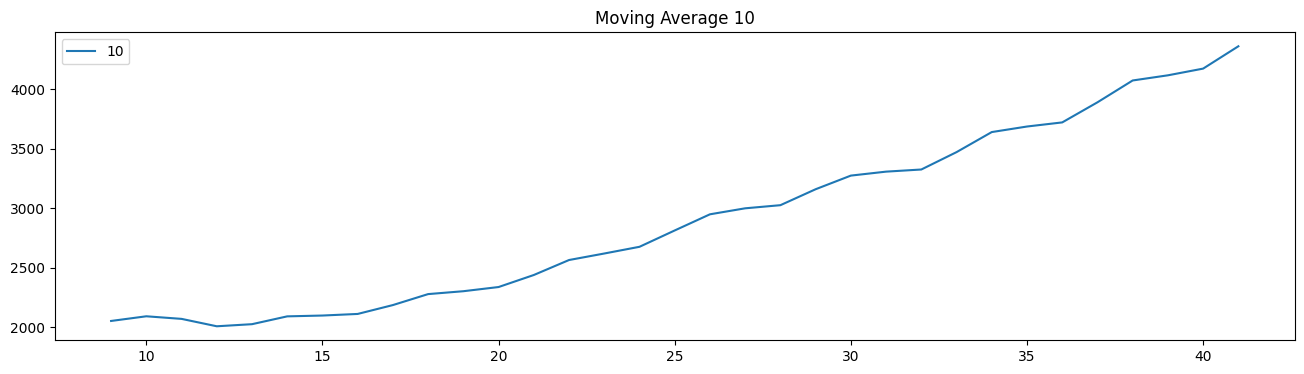

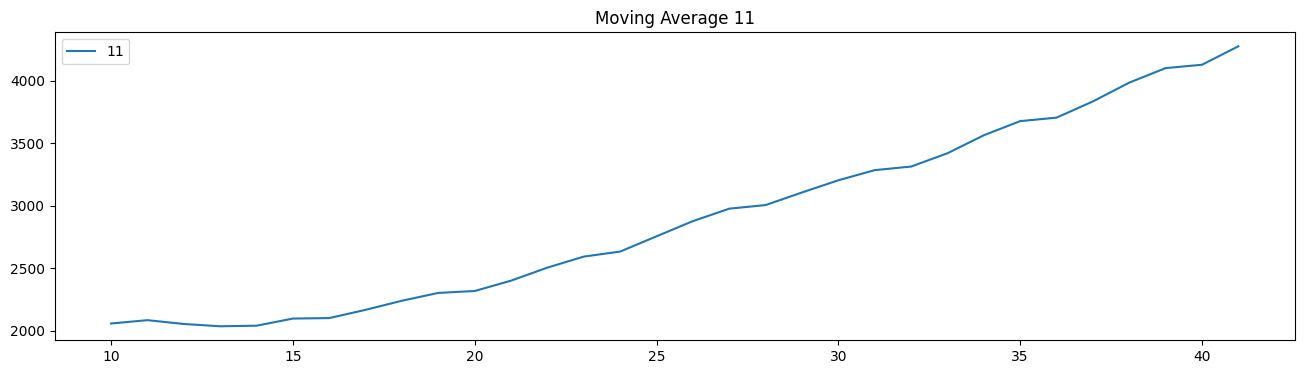

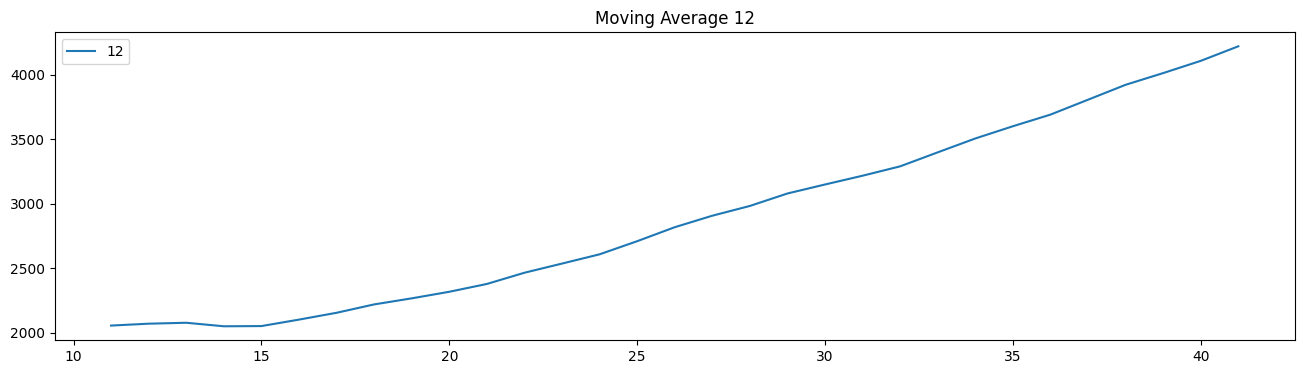

In [55]:
plt.figure(figsize=(16,4))
data.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,13):
    plt.figure(figsize=(16,4))
    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()


## Time series decomposition plot

Decompose a time series into its components: trend, seasonality, and residual (or error)

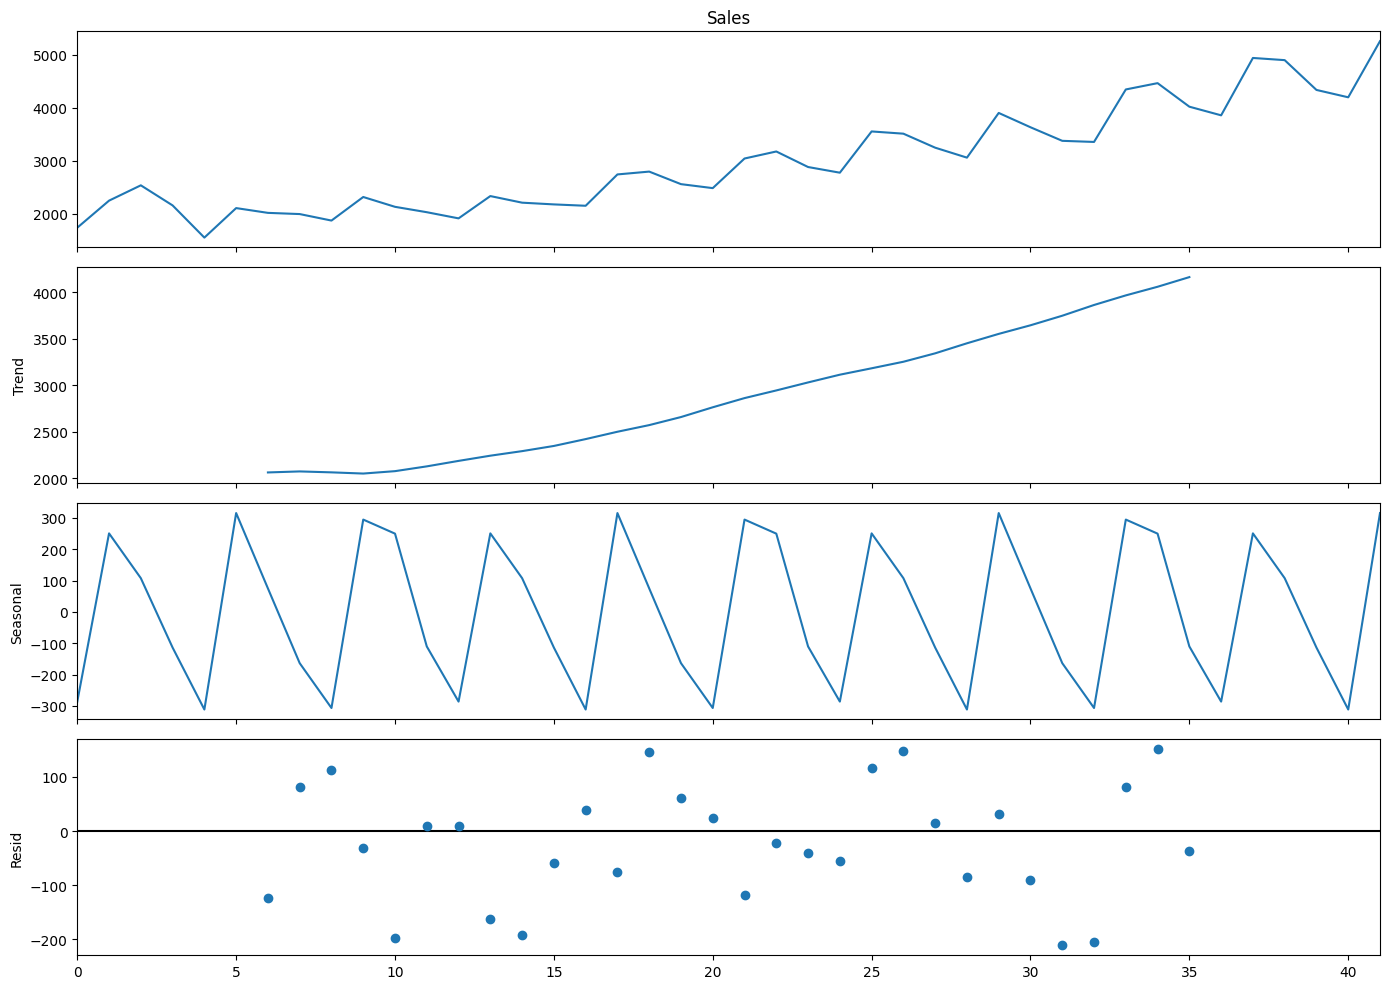

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts = seasonal_decompose(data.Sales,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts.plot()
    plt.show()

### Observation:-
1. **Observed** - Actual data
2. **Trend** - Increasing trend.
3. **Seasonal** -
    * Varies from +50 to -50 with the mean 0.
    * Each cycle represents each year trend.
    * The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is +50 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 50+100 = 150.
4. **Residual** - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

### Additive Seasonal Decomposition

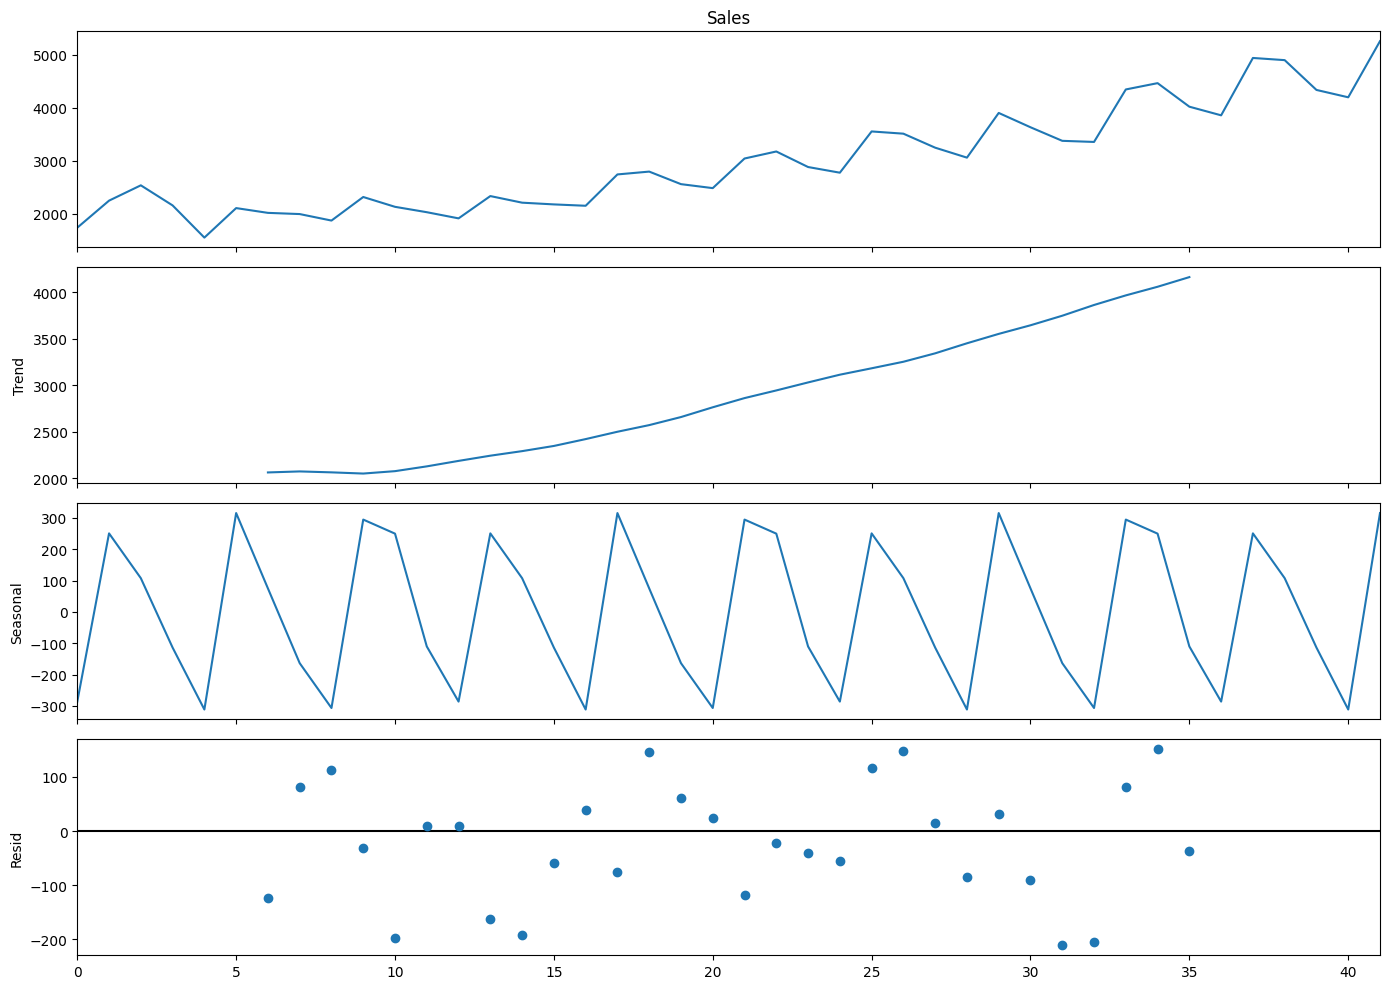

In [57]:
decompose_ts_add = seasonal_decompose(data.Sales, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### Multiplicative Seasonal Decomposition

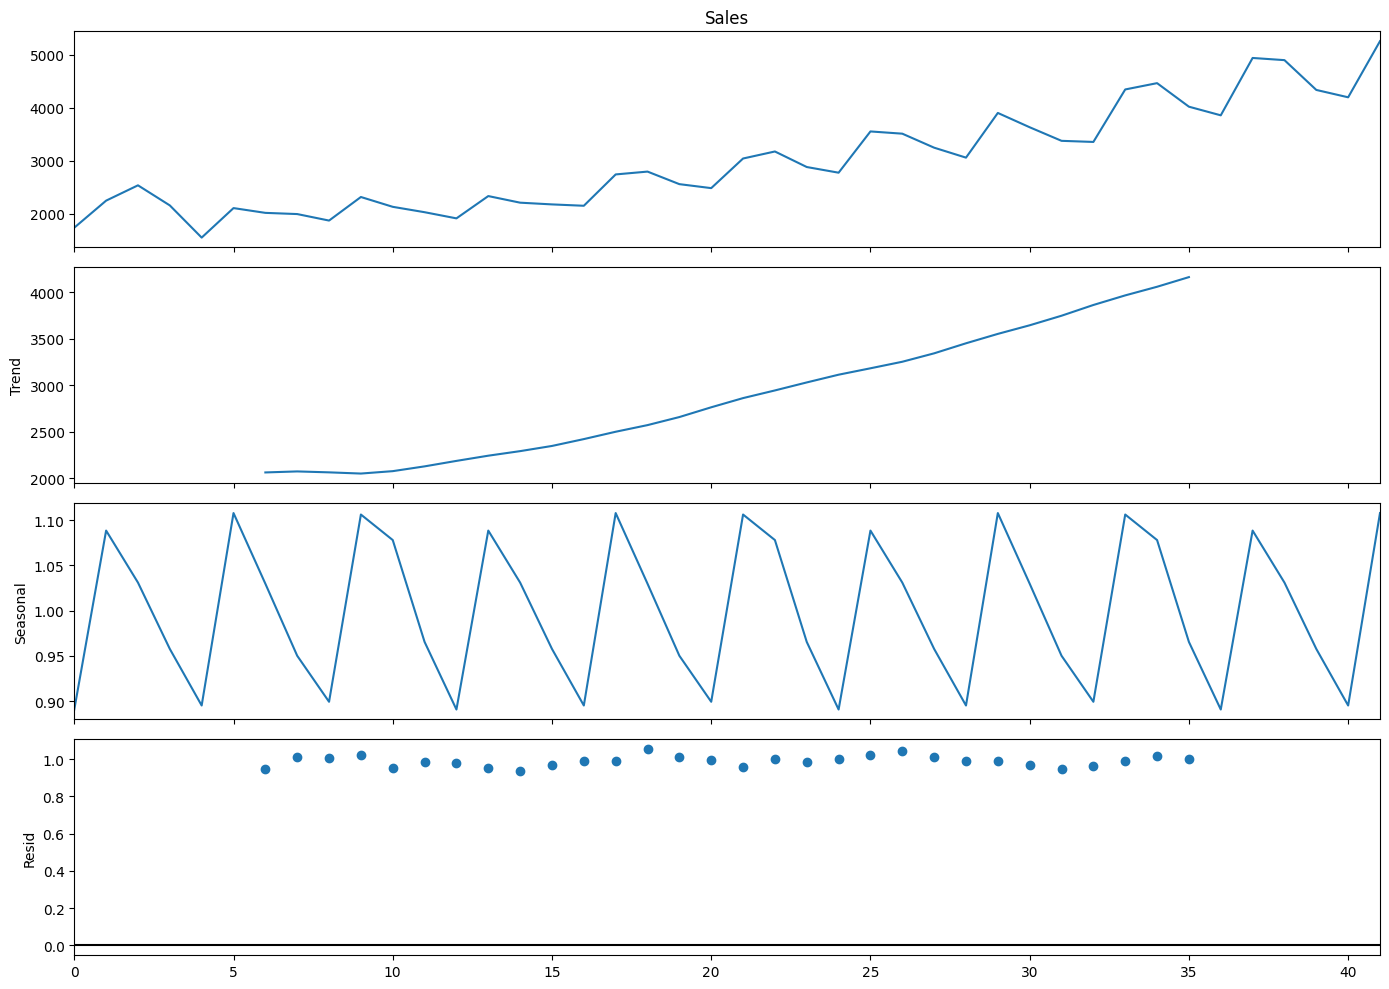

In [58]:
decompose_ts_add = seasonal_decompose(data.Sales,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### Observation:-
**Seasonal** -

1. Varies from 0.8 to 1.2
2. The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is 1.2 and the trend value is 100. Hence, the actual value(passengers number) will (seasonal X Trend) value = 1.2 X 100 = 120.

## ACF (autocorrelation function) plots

 the autocorrelation between a time series and its lagged values

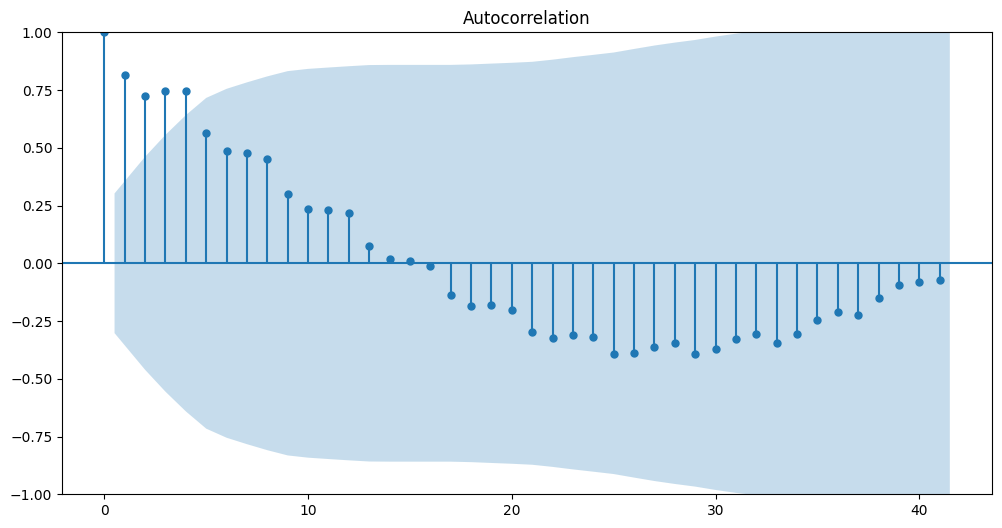

In [60]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(data.Sales,lags=41)
    plt.show()

Autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation

## Partial Autocorrelation Function (PACF)

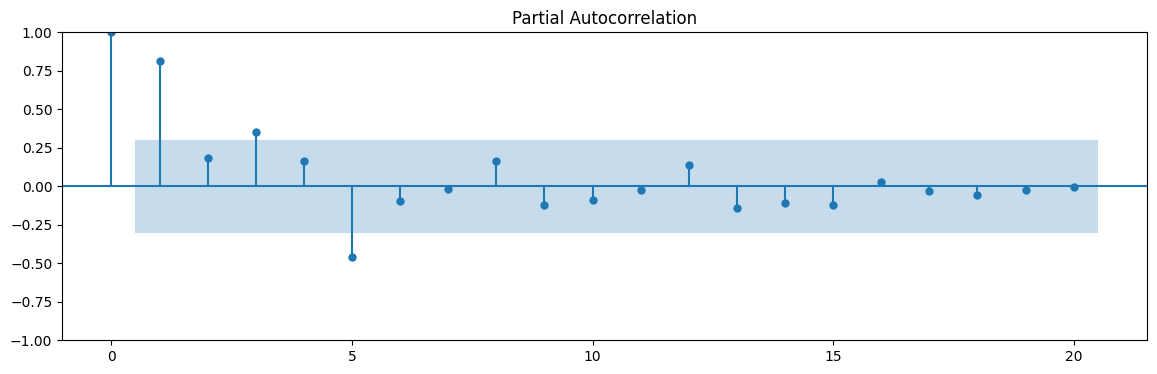

In [64]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(data.Sales,lags=20)
    plt.show()

A partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

# Model Analysis

In [69]:
import datetime
data['m'] = range(1,(data.shape[0]+1))
data['m_square'] = np.power(data['m'],2)
data['log_Sales']=np.log(data['Sales'])
data.tail()

,Date,Sales,Year,Month,m,m_square,log_Sales
37,1995-04-01,4936.0,1995,Apr,38,1444,8.504311
38,1995-07-01,4895.0,1995,Jul,39,1521,8.495970
39,1995-10-01,4333.0,1995,Oct,40,1600,8.374015
40,1996-01-01,4194.0,1996,Jan,41,1681,8.341410
41,1996-04-01,5253.0,1996,Apr,42,1764,8.566555


In [70]:
Train = data.head(34)
Test = data.tail(8)
Train.head()

,Date,Sales,Year,Month,m,m_square,log_Sales
0,1986-01-01,1734.827000,1986,Jan,1,1,7.458663
1,1986-04-01,2244.960999,1986,Apr,2,4,7.716443
2,1986-07-01,2533.804993,1986,Jul,3,9,7.837477
3,1986-10-01,2154.962997,1986,Oct,4,16,7.675529
4,1987-01-01,1547.818996,1987,Jan,5,25,7.344602


#### We are going to forecat for the last two year.
#### Last 8 records contain.

In [71]:
train_data = Train[['Date', 'Sales']].copy().reset_index(drop=True)
train_data.set_index('Date', inplace=True)
test_data = Test[['Date', 'Sales']].copy().reset_index(drop=True)
test_data.set_index('Date', inplace=True)
print('Train:',train_data.index.min(),train_data.index.max(),'\n', 'Test:',test_data.index.min(),test_data.index.max())
train_data

Train: 1986-01-01 00:00:00 1994-04-01 00:00:00 
 Test: 1994-07-01 00:00:00 1996-04-01 00:00:00


,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


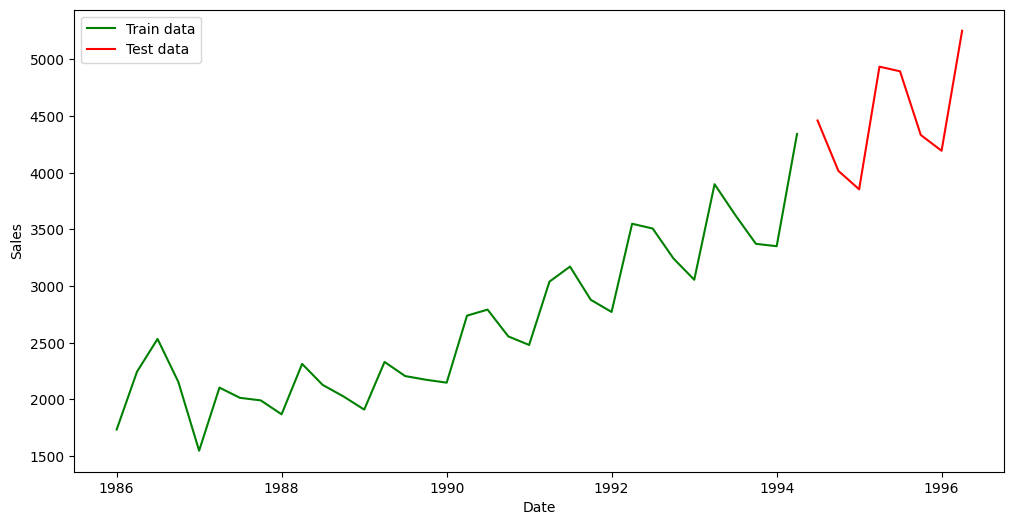

In [72]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

# Ordinary Square Model

## Linear Model

In [74]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~m',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['m'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

720.6137817965266

## Exponential model

In [75]:
Exp = smf.ols('log_Sales~m',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['m'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.9850937274324

## Qadratic model

In [76]:
Quad = smf.ols('Sales~m+m_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["m","m_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

437.7455637558691

## Additive seasonality

In [84]:
df = pd.get_dummies(data['Month'],columns=['Jan','Apr','Jul','Oct'])
df = pd.concat([data[['Sales', 'Year','m','log_Sales']], df], axis=1)
Train = df.head(34)
Test = df.tail(8)
df

,Sales,Year,m,log_Sales,Apr,Jan,Jul,Oct
0,1734.827000,1986,1,7.458663,False,True,False,False
1,2244.960999,1986,2,7.716443,True,False,False,False
2,2533.804993,1986,3,7.837477,False,False,True,False
3,2154.962997,1986,4,7.675529,False,False,False,True
4,1547.818996,1987,5,7.344602,False,True,False,False
5,2104.411995,1987,6,7.651791,True,False,False,False
6,2014.362999,1987,7,7.608058,False,False,True,False
7,1991.746998,1987,8,7.596767,False,False,False,True
8,1869.049999,1988,9,7.533186,False,True,False,False
9,2313.631996,1988,10,7.746574,True,False,False,False


In [86]:
add_sea = smf.ols('Sales~Jan+Apr+Jul+Oct',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Apr','Jul','Oct']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1870.1899069853293

In [87]:
Mul_Add_sea = smf.ols('log_Sales~m+Jan+Apr+Jul+Oct',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 400.42004584370045


## Forcasting

In [88]:
data_1 = [['1997-01-01', 'Jan'], ['1997-04-01', 'Apr'],['1997-07-01', 'Jul'],['1997-10-01', 'Oct']]
forecast = pd.DataFrame(data_1, columns = ['Date', 'Months'])
forecast

,Date,Months
0,1997-01-01,Jan
1,1997-04-01,Apr
2,1997-07-01,Jul
3,1997-10-01,Oct


In [90]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["m"] = np.arange(1,5)   
forecast1["m_squared"] = forecast1["m"]*forecast1["m"] 
print("\nAfter Dummy, M and M-Square\n\n",forecast1.head())


After Dummy, M and M-Square

          Date Months    Apr    Jan    Jul    Oct  m  m_squared
0  1997-01-01    Jan  False   True  False  False  1          1
1  1997-04-01    Apr   True  False  False  False  2          4
2  1997-07-01    Jul  False  False   True  False  3          9
3  1997-10-01    Oct  False  False  False   True  4         16


In [91]:
model_full = smf.ols('log_Sales~m+Jan+Apr+Jul+Oct',data =df).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Sales'] = np.exp(forecast1['Forecasted_log'])
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Sales']] 
forecast1

,Date,Months,Apr,Jan,Jul,Oct,m,m_squared,Forecasted_log,Forecasted_Sales
0,1997-01-01,Jan,False,True,False,False,1,1,7.339224,1539.516800
1,1997-04-01,Apr,True,False,False,False,2,4,7.579747,1958.133190
2,1997-07-01,Jul,False,False,True,False,3,9,7.571328,1941.716476
3,1997-10-01,Oct,False,False,False,True,4,16,7.491254,1792.297460


## Exponential Methods

### MAPE

In [92]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method
### Using Forecast Attribute

In [94]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.forecast(8)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 13.333396458991603 
 Train Root Mean Squared Error = 358.517455960869 
 Test Root Mean Squared Error  = 786.8359863846738


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


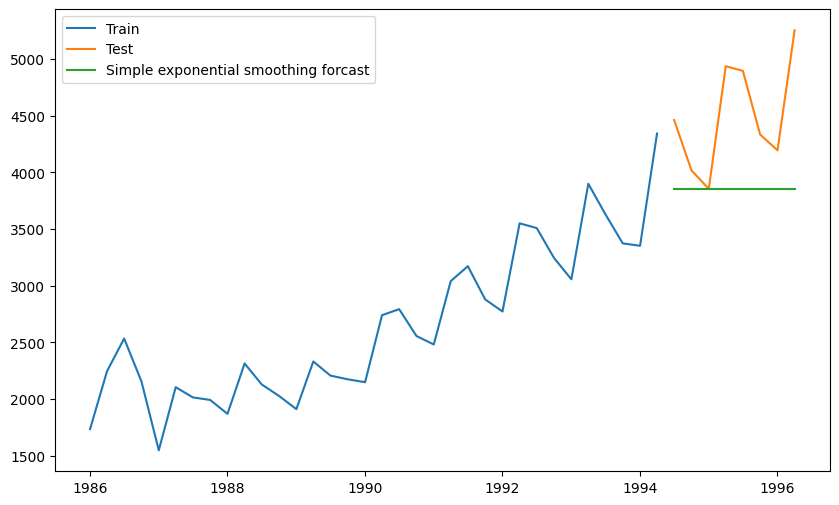

In [95]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Observation
1. No seasonality captures.
2. Most recent observation gets higher weightages than the older ones for forecasting.

### Holt method (Double Exponential)
#### Captures both Level and Trend .

In [96]:
from statsmodels.tsa.holtwinters import Holt
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(8)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Sales))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 9.130854968793145 
 Train Root Mean Squared Error = 413.71073076117415 
 Test Root Mean Squared Error  = 459.77565063357093


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


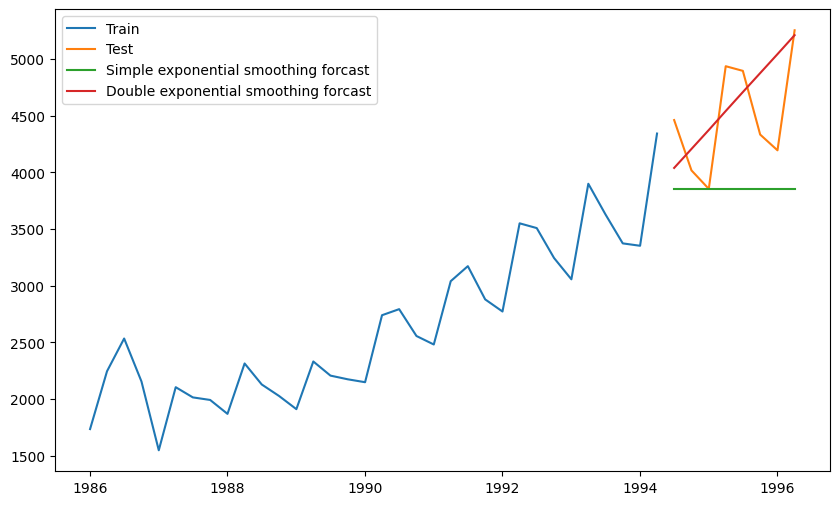

In [97]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Observation
1. We can see that we are able to capture the trend of the data.
2. We were not able to capture the seasonality.

### Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
#### Captures Level, Trend and Seasonality.

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(8)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Sales))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Sales)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_texp))

c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = 5.977597320715693 
 Train Root Mean Squared Error = 170.60361369266082 
 Test Root Mean Squared Error  = 360.5098748459023


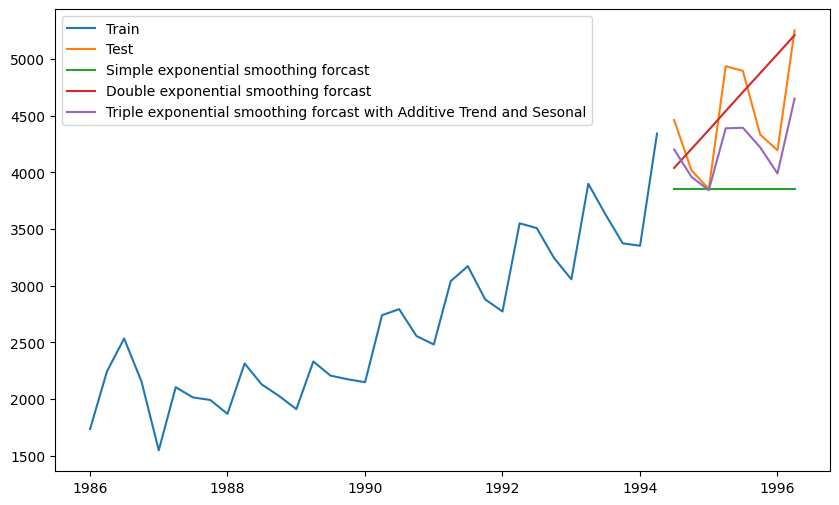

In [99]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

### Observation
1. It captures the trend, which we can see that the forecasted values are lower level than the test level.
2. It also captures the seasonality.
3. The peak of the forecasted value is lower than the actual.

### Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [100]:
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(8)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.Sales))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.Sales)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_ad_texp))

c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 7.201201237665288 
 Train Root Mean Squared Error = 137.74176029620114 
 Test Root Mean Squared Error  = 358.6343907009261


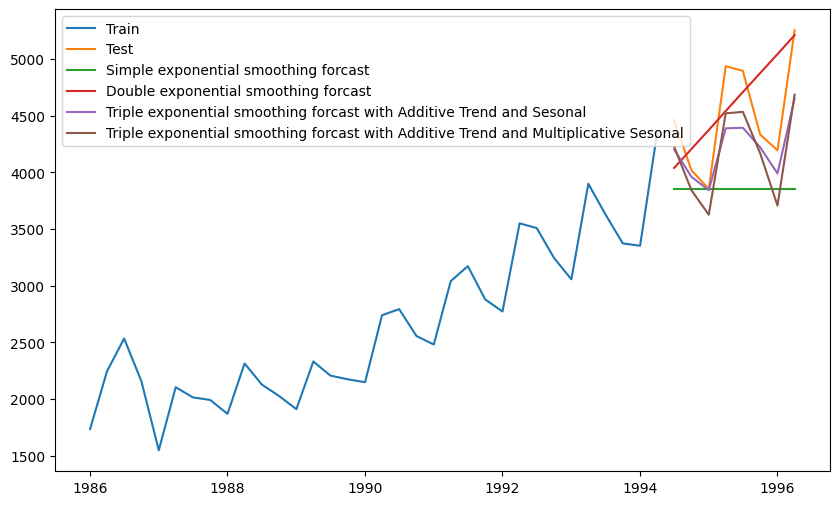

In [101]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

### Observation
1. We can see that the errors have reduced drastically once we are able to capture the level, trend and seasonality altogether.

### Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

In [102]:
texp_ad_mul_model = ExponentialSmoothing(train_data,seasonal="add",trend="mul",
                    seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(8)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Sales))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Sales)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 5.152697885538064 
 Train Root Mean Squared Error = 313.9912778027064 
 Test Root Mean Squared Error  = 239.06155161939856


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


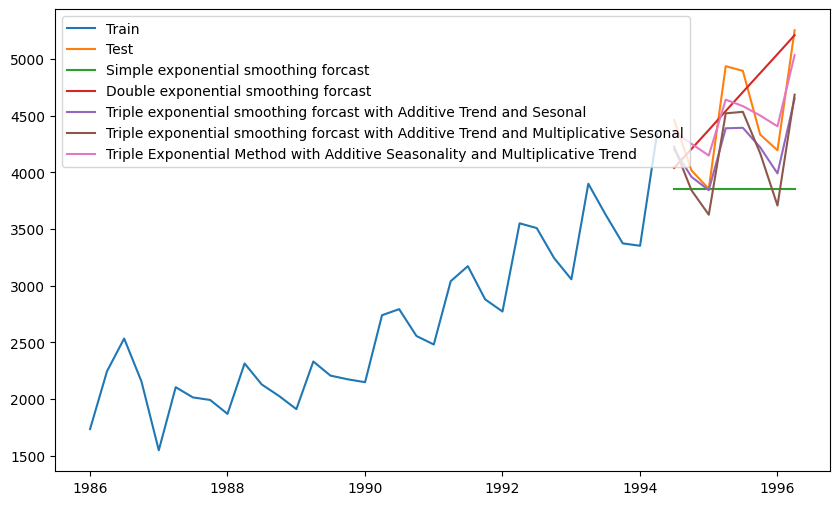

In [103]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

### Observation
1. It captures the trend, which we can see that the forecasted values are higher level than the test level.
2. It also captures the seasonality.
3. The peak of the forecasted value is higher than the actual.

### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [104]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=4).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(8)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Sales))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Sales)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 2.518046321332973 
 Train Root Mean Squared Error = 140.52564689283304 
 Test Root Mean Squared Error  = 129.07748186115933


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


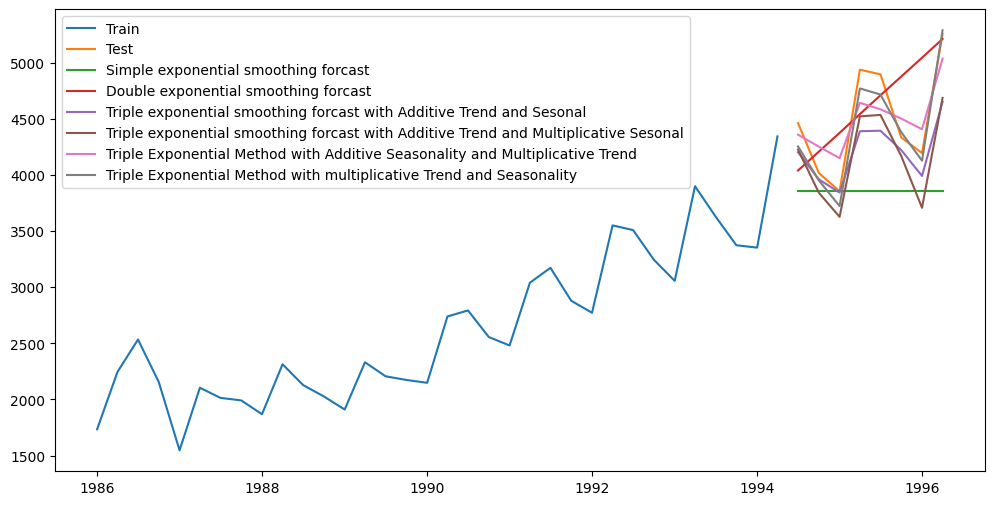

In [106]:
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

### Comparing the results 

In [107]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation = pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Triple_Exp_Mul,140.525647,2.518046,129.077482
1,Triple_Exp_Add_Mul,313.991278,5.152698,239.061552
2,Triple_Exp_Add,170.603614,5.977597,360.509875
3,Triple_Exp_Mul_Add,137.741760,7.201201,358.634391
4,Double_Exp,413.710731,9.130855,459.775651
5,Simple_Exp,358.517456,13.333396,786.835986


### Visualizing Models Performance

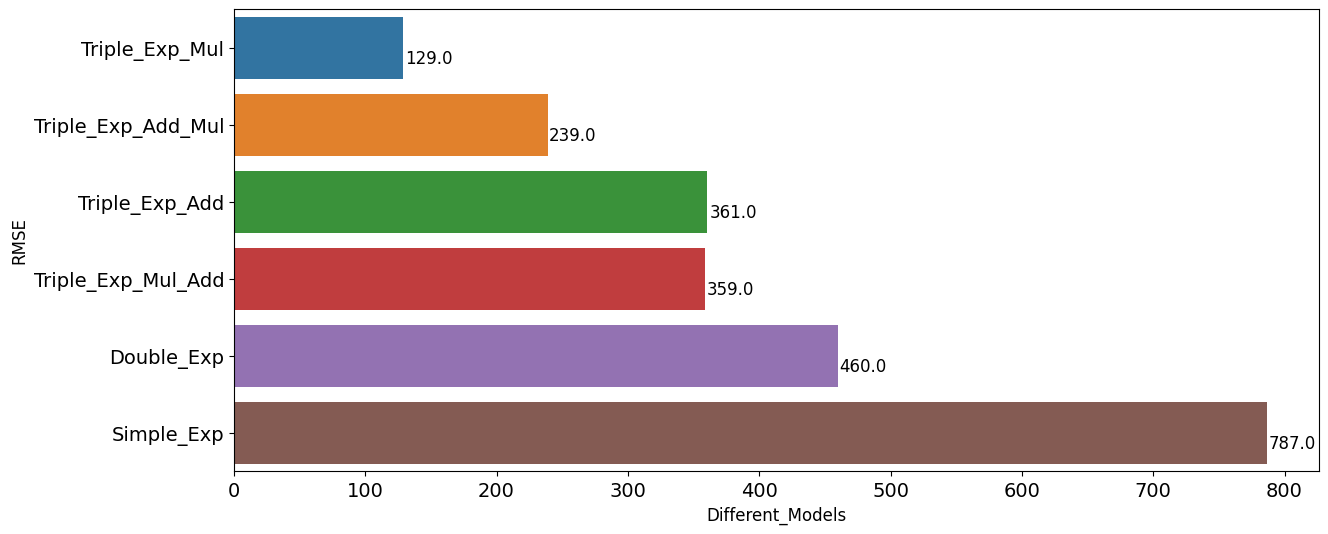

In [108]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x= 'Test_RMSE_Values', y= 'Models', data= table_evaluation, ax= axe)
axe.set_xlabel('Different_Models', size=12)
axe.set_ylabel('RMSE', size=12)
plt.yticks(fontsize= 14)
plt.xticks(fontsize= 14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontsize= 12)
plt.show()

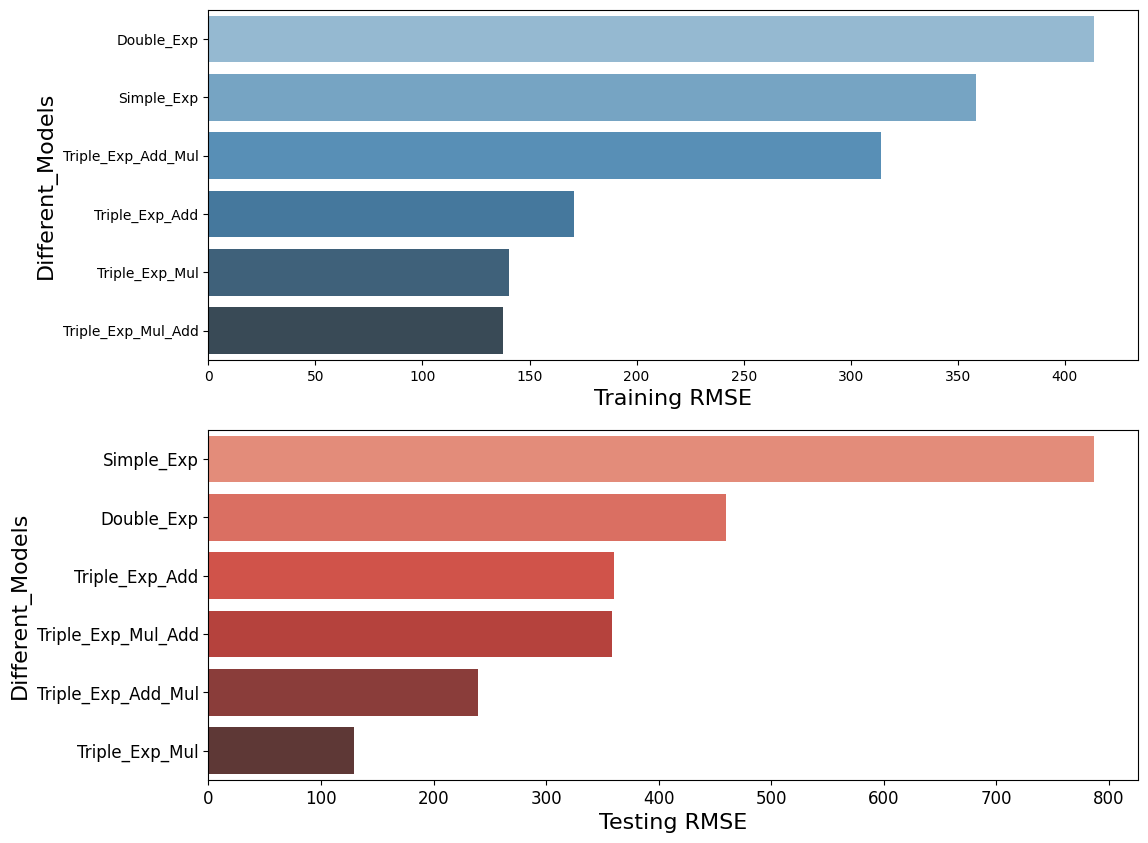

In [109]:
f, axes = plt.subplots(2,1, figsize=(12,10))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models', size=16)

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models', size=16)

plt.show()

## Autoregressive Integrated Moving Averages (ARIMA)

### Stationary vs Non-stationary Time Series
### Test of Stationarity
#### As we have yearly data the window size for moving average is equal to 12

In [112]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

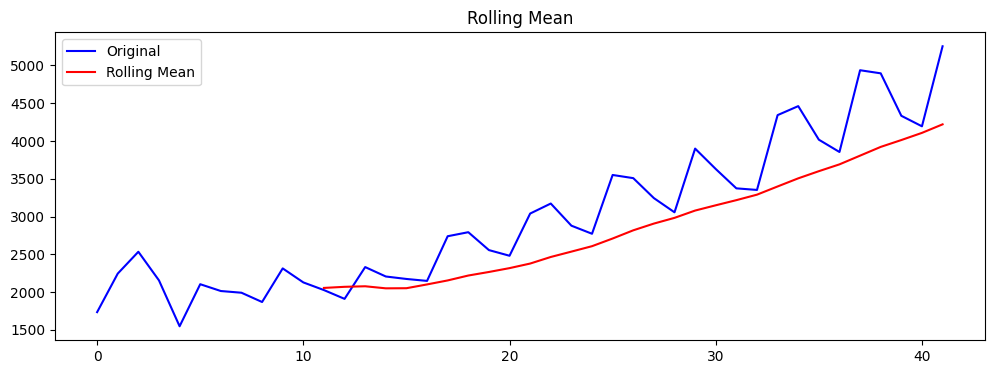

Results of Dickey Fuller Test:
Test Statistic                  1.309421
p-value                         0.996661
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [113]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Sales'] = data[['Sales']]
test_stationarity(sales)

In [114]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [115]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


### Feature Scaling (Transformations)
### 1. Square Root Transform

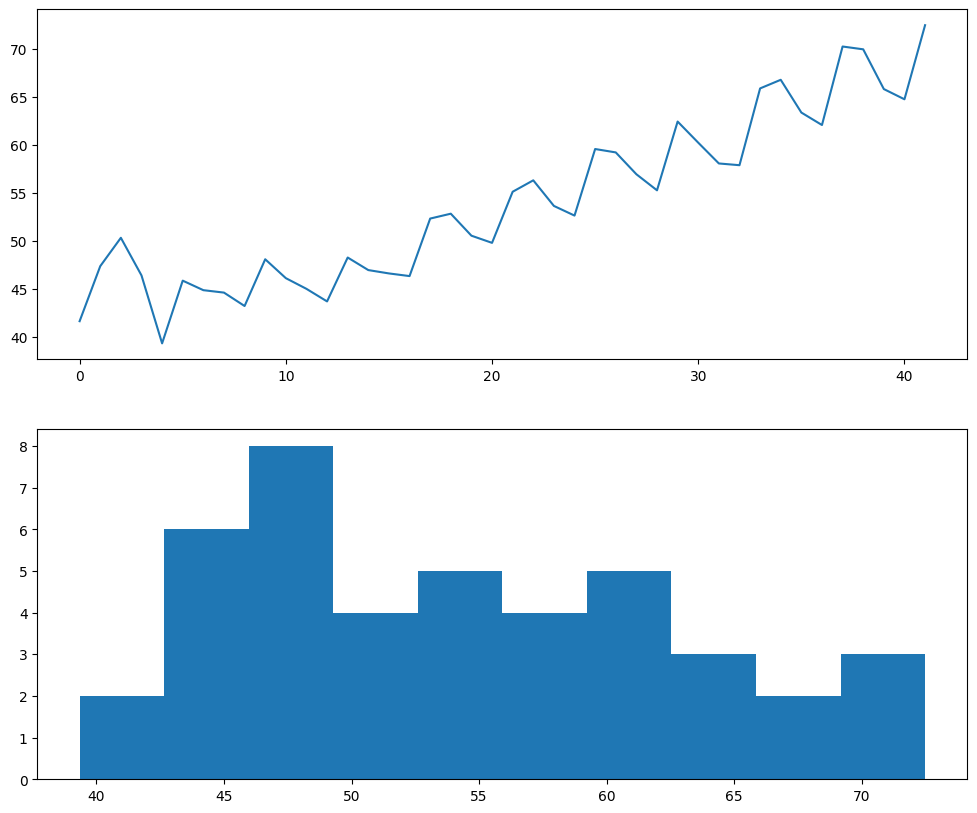

In [116]:
square_root= pd.DataFrame()
square_root = data[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

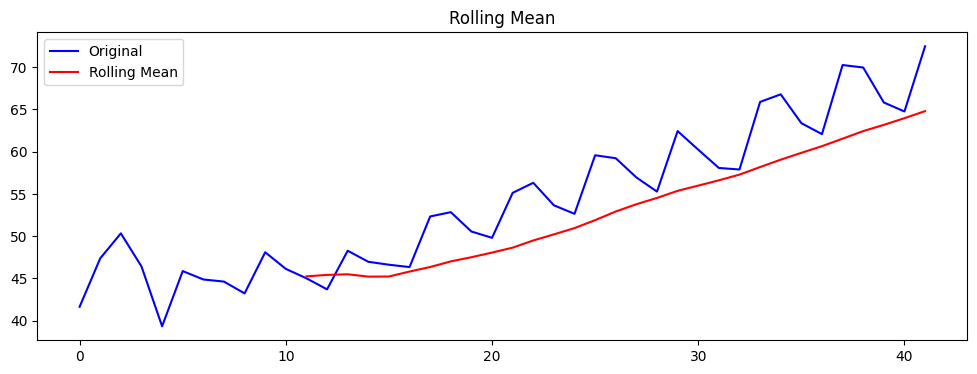

Results of Dickey Fuller Test:
Test Statistic                  0.828594
p-value                         0.992084
#Lags Used                      6.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [117]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)
adf_test(square_root)

### 2. Log Transform

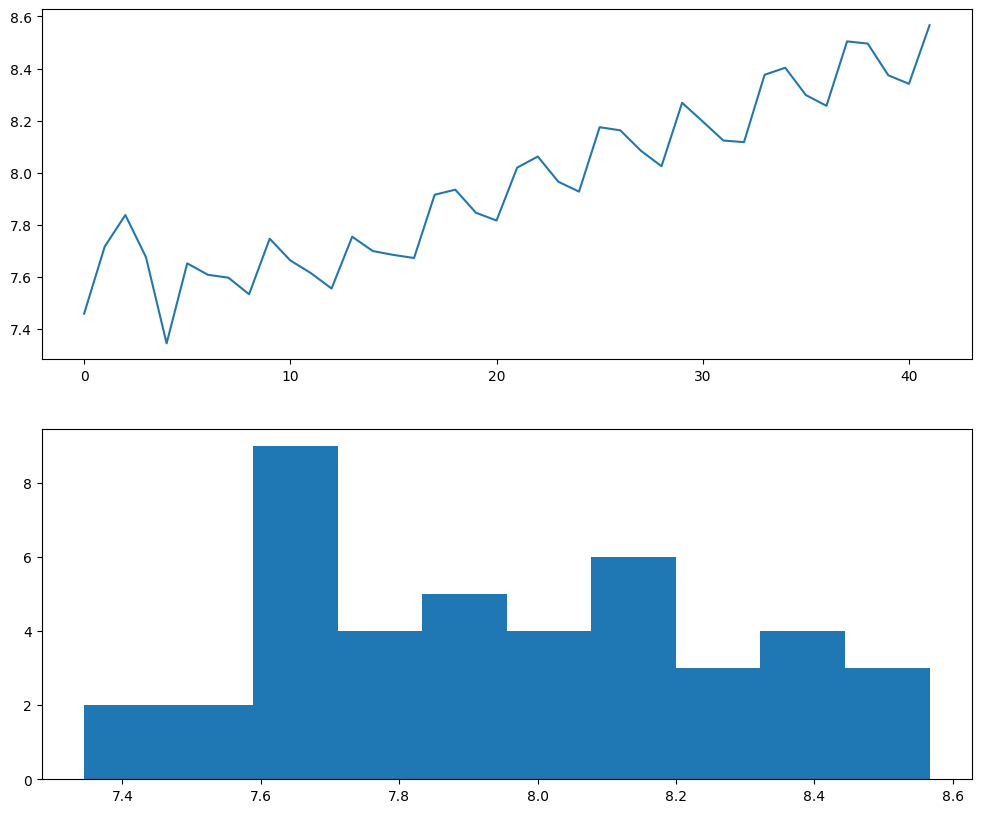

In [118]:
log = pd.DataFrame()
log = data[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])

# Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()


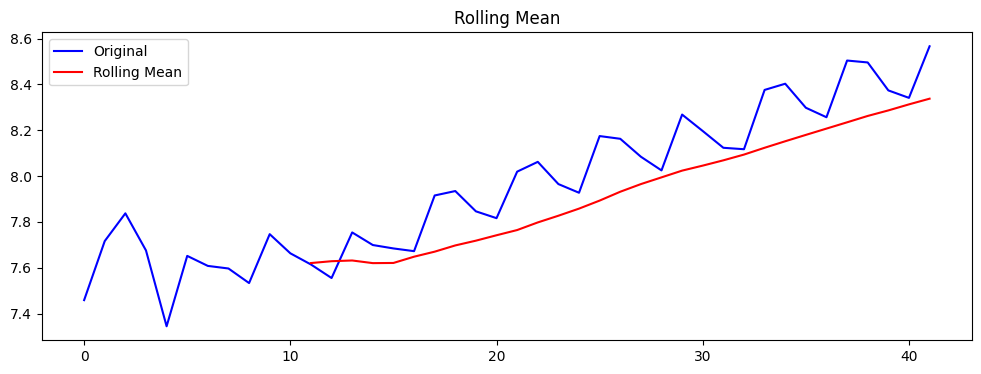

Results of Dickey Fuller Test:
Test Statistic                  0.192820
p-value                         0.971856
#Lags Used                      6.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [119]:
plt.figure(figsize=(12,4))
test_stationarity(log)
adf_test(log)

#### Hence, the Time series data is Non-Stationary

### 3. Converting Non-Stationary Time Series into Stationary
### Differencing

In [120]:
data_M= data[['Date', 'Sales']].copy()
data_M.set_index('Date', inplace=True)
data_M

,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


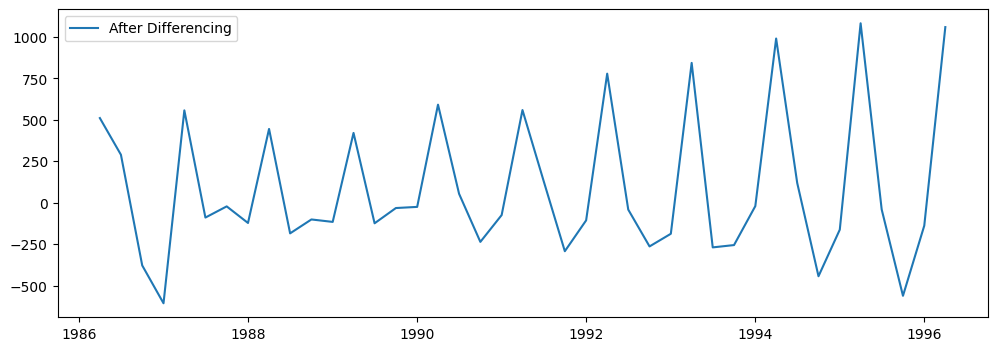

In [121]:
differencing = data_M - data_M.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

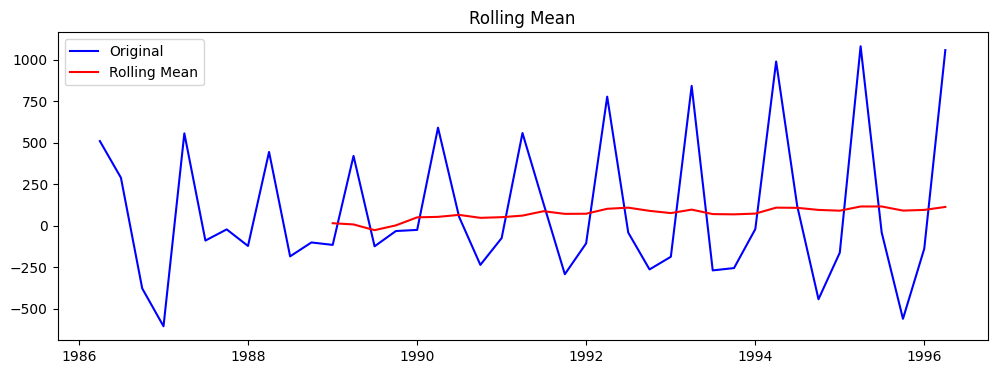

Results of Dickey Fuller Test:
Test Statistic                 -2.501537
p-value                         0.115101
#Lags Used                      3.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [122]:
plt.figure(figsize=(12,4))
test_stationarity(differencing)
adf_test(differencing)

### Seasonal Differencing

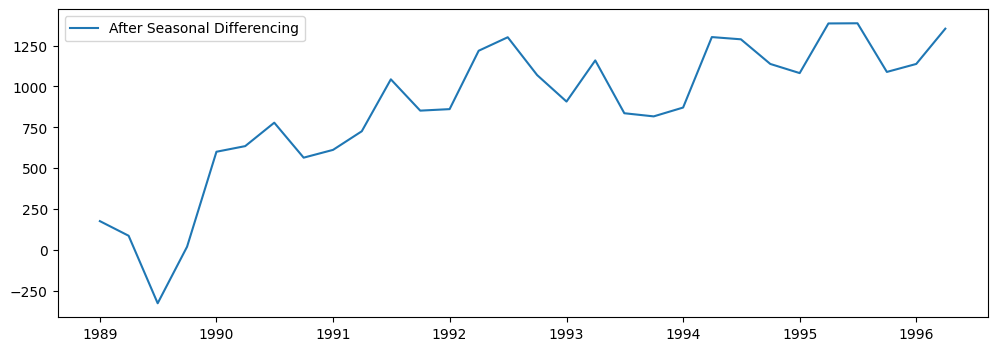

In [123]:
seasonal_differencing = data_M - data_M.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

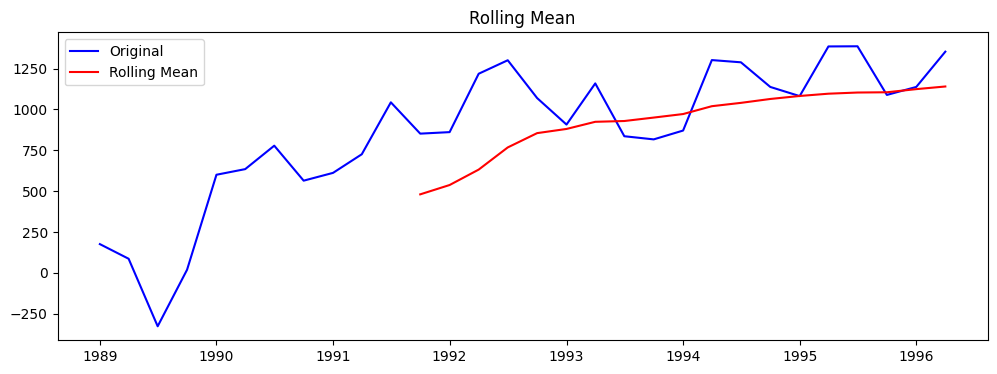

Results of Dickey Fuller Test:
Test Statistic                 -1.461882
p-value                         0.552276
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [124]:
plt.figure(figsize=(12,4))
test_stationarity(seasonal_differencing)
adf_test(seasonal_differencing)

### Transformation

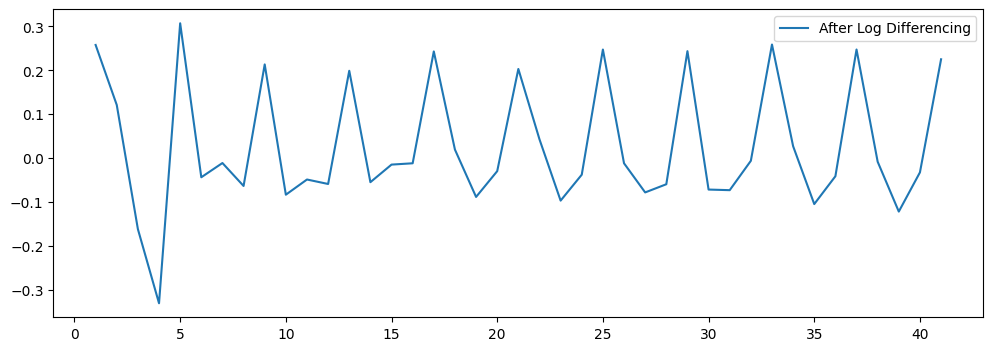

In [125]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

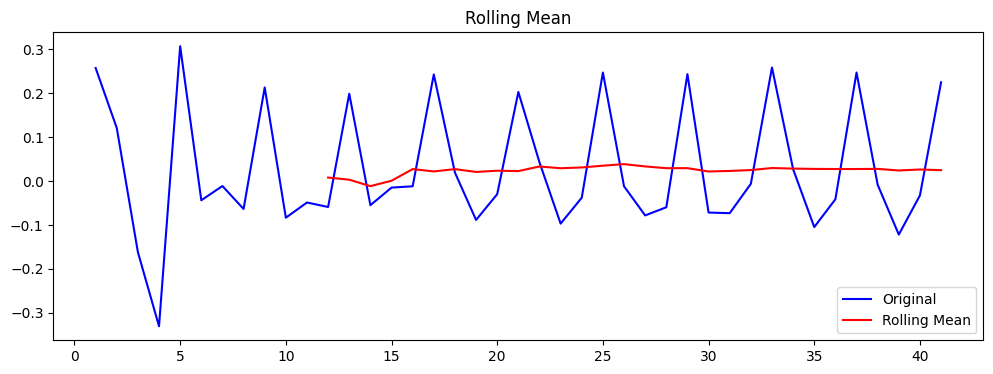

Results of Dickey Fuller Test:
Test Statistic                 -3.190392
p-value                         0.020548
#Lags Used                      6.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64
Reject the null hypothesis
Data is stationary


In [126]:
plt.figure(figsize=(12,4))
test_stationarity(log_diff)
adf_test(log_diff)

### Box Cox Transformation

,Sales
Date,
1986-01-01,7.458663
1986-04-01,7.716443
1986-07-01,7.837477
1986-10-01,7.675529
1987-01-01,7.344602


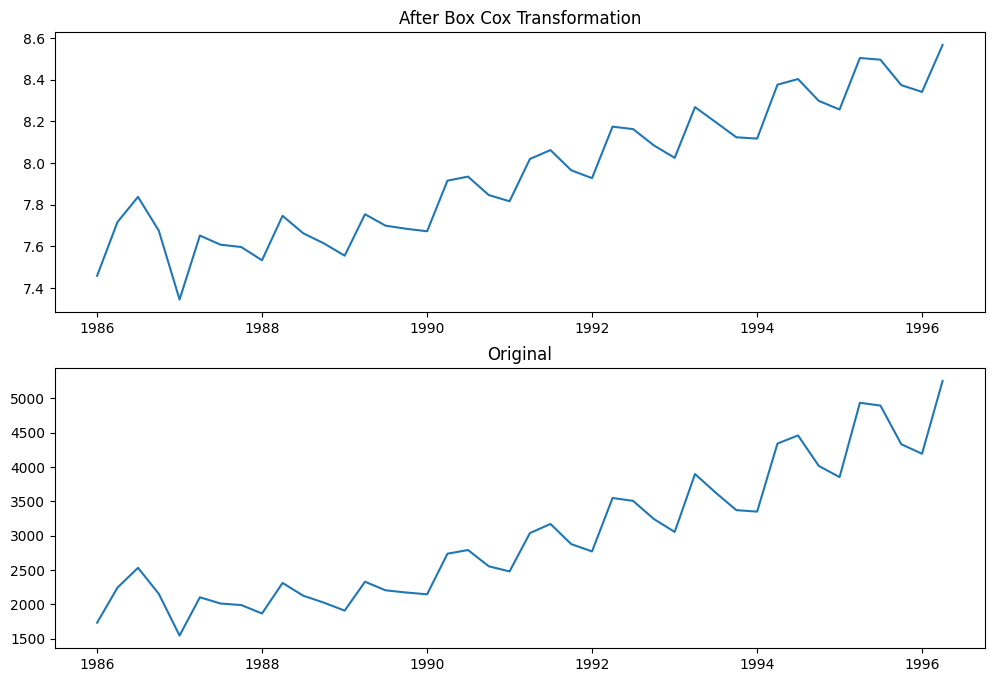

In [127]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(data_M['Sales'], lmbda=0), data_M.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(data_M, label='original')
axis[1].set_title('Original')
plt.show()

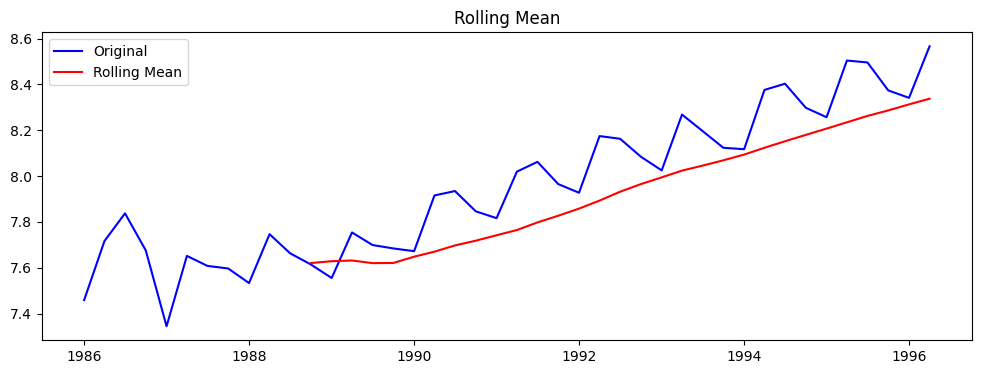

Results of Dickey Fuller Test:
Test Statistic                  0.192820
p-value                         0.971856
#Lags Used                      6.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [128]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)
adf_test(data_boxcox)

### Differencing of the Box-Cox Transformation

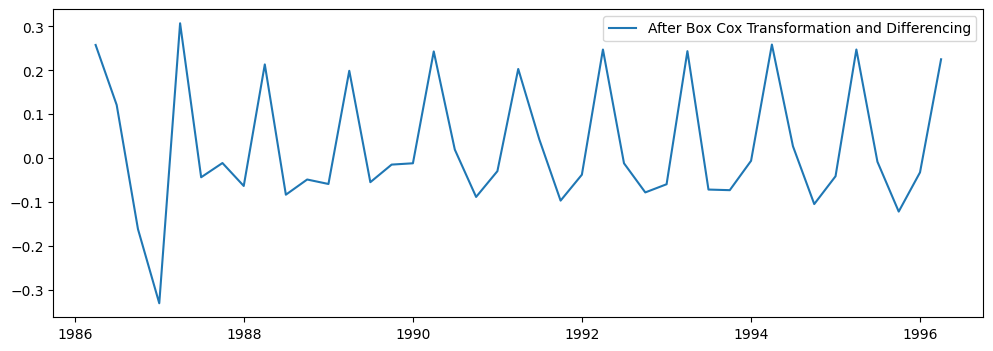

In [129]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

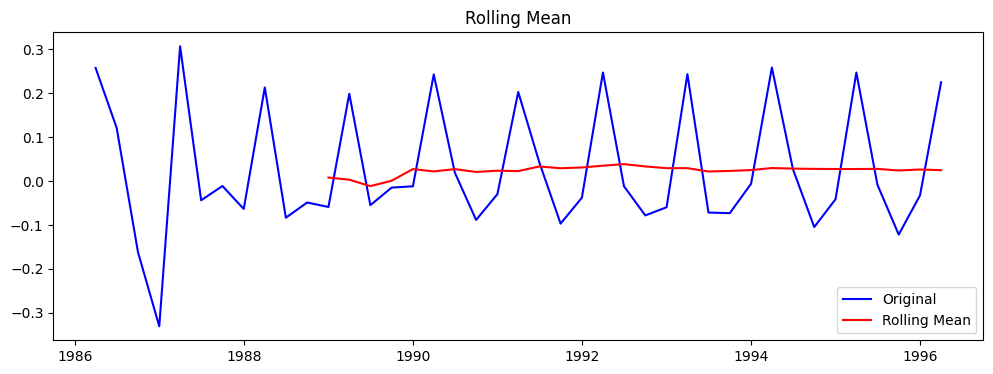

Results of Dickey Fuller Test:
Test Statistic                 -3.190392
p-value                         0.020548
#Lags Used                      6.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64
Reject the null hypothesis
Data is stationary


In [130]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)
adf_test(data_boxcox_diff)

### Building The Time Series Forecasting with Optimal Value using ARIMA

In [131]:
size=8
train_data_boxcox = data_boxcox[:size]
test_data_boxcox = data_boxcox[size:]
train_data_boxcox_diff = data_boxcox_diff[:size]
test_data_boxcox_diff = data_boxcox_diff[size:]
test_data_boxcox_diff

,Sales
Date,
1988-04-01,0.213388
1988-07-01,-0.083486
1988-10-01,-0.048860
1989-01-01,-0.059053
1989-04-01,0.198949
1989-07-01,-0.054938
1989-10-01,-0.014876
1990-01-01,-0.011887
1990-04-01,0.243039


### ARIMA Hyperparameter Tuning


In [132]:
# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE
from statsmodels.tsa.arima.model import ARIMA
def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# Evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Sales, p_values, d_values, q_values)

#### Inverse transformation of the Box-Cox Differencing

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Sales[0])

# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

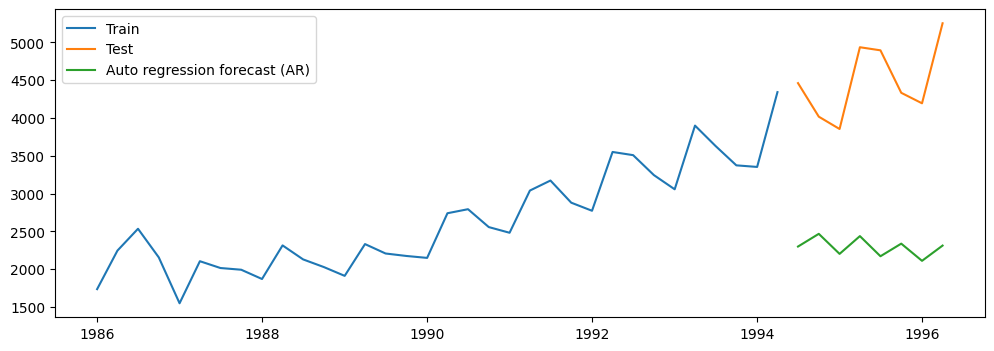

In [136]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

## Model Evaluation
### RMSE (Root Mean Squared Error)

In [137]:
rmse_arima = np.sqrt(mean_squared_error(test_data, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

2249.0

### MAPE (Mean Absolute Percent Error)

In [138]:
mape_arima = round(np.mean(np.abs((test_data.Sales - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Sales)*100),2)
mape_arima

48.5

### Observation
1. We can see that AR model has done reasonably good job but not better than Holt's method.
2. We souldn't compare it with Holt's method. Because Holt's method captures seasonality

### Analysing the Residuals
#### The mean of the Residual should be zero or close to Zero

In [139]:
model_residual = model_fit.resid
model_residual.mean()

-0.06604135017687443

#### Residuals must be stationary

In [140]:
adf_test(model_residual)

Fail to reject the null hypothesis
Data is non-stationary


## Conclusion:

### The best model we have got so far with the lowest RMSE and lowest MAPE.

In [95]:
# import plotly.express as px

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.seasonal import seasonal_decompose

